## Credit Card/Risk Classification

### Context
* Credit scoring cards are a common method of risk control in the financial industry.
* The bank uses personal information and data provided by credit card applicants to predict the likelihood of future credit card defaults and borrowings.
* The bank has the right to make a decision on issuing a credit card to the applicant.
* Credit scores can objectively quantify the amount of risk.
* It is required to create a machine learning model to predict whether a candidate is a "good" or "bad" client
* The dataset was taken from open sources
https://www.kaggle.com/datasets/samuelcortinhas/credit-card-classification-clean-data

## Data description

### Input variables:
- `ID` (Client ID)
- `Gender` (Gender (1=Male, 0=Female))
- `Own_car` (Does client own a car? (1=Yes, 0=No))
- `Own_property` (Does client own property? (1=Yes, 0=No))
- `Work_phone` (Does client own a work phone? (1=Yes, 0=No))
- `Phone` (Does client own a phone? (1=Yes, 0=No))
- `Email` (Does client have an email address? (1=Yes, 0=No))
- `Unemployed` (Is client unemployed? (1=Yes, 0=No))
- `Num_children` (Number of children)
- `Num_family` (Number of family members)
- `Account_length` (Number of months credit card has been owned)
- `Total_income` (Total income (chinese yuan))
- `Age`
- `Years_employed`
- `Income_type`
- `Education_type`
- `Family_status`
- `Housing_type`
- `Occupation_type`

### Output variable (desired target):
- `Target` (1=high risk, 0=low risk)

## Project structure

### 1. [Exploratory Data Analysis (EDA)](#analysis)
   * [1.1. Loading and primary data processing
     (duplicates, missing values, structures and data types, etc.)](#analysis1)
   * [1.2. EDA: study of distributions of numerical/categorical features, correlation analysis](#analysis2)
  
### 2. [Building and training models](#model)
   * [2.1. Processing data to build models](#model1)
   
   * [2.2. Selection of parameters and training of the DummyClassifier model](#model2)
   
   * [2.3. Selection of parameters and training of the CatBoostClassifier model](#model3)
   
   * [2.4. Selection of parameters and training of the model RandomForestClassifier](#model4)
   
   * [2.5. Selection of parameters and training of the DecisionTreeClassifier model](#model5)
   
   * [2.6. Building and training a Keras Sequential model (without cross-validation)](#model6)

### 3. [Conclusions and selection of the best model](#conclusion)

<a id="analysis"></a>
## 1. Exploratory Data Analysis (EDA)

<a id="analysis1"></a>
### 1.1. Loading and primary data processing

In [1]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle
from plot_metric.functions import BinaryClassification
import itertools
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
import tensorflow as tf
from keras import metrics
import pickle
import sweetviz as sw
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from tensorflow.keras.utils import to_categorical
from sklearn import datasets, metrics, model_selection, svm
from sklearn.model_selection import cross_val_score, GridSearchCV 
from sklearn.utils import class_weight
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,\
                            precision_recall_curve, roc_curve, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# remove the restriction on the number and width of columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# Load the table from an external drive
file_id = '1jkeisjkD7R3JL36ZH1p_vY6zP3tFwVBP'
download_link = f'https://drive.google.com/uc?id={file_id}'
bank = pd.read_csv(download_link)

In [5]:
bank.head()

ID  Gender  Own_car  Own_property  Work_phone  Phone  Email  \
0  5008804  1       1        1             1           0      0       
1  5008806  1       1        1             0           0      0       
2  5008808  0       0        1             0           1      1       
3  5008812  0       0        1             0           0      0       
4  5008815  1       1        1             1           1      1       

   Unemployed  Num_children  Num_family  Account_length  Total_income  \
0  0           0             2           15              427500.0       
1  0           0             2           29              112500.0       
2  0           0             1           4               270000.0       
3  1           0             1           20              283500.0       
4  0           0             2           5               270000.0       

         Age  Years_employed           Income_type  \
0  32.868574  12.435574       Working                
1  58.793815  3.104787        Working                
2  52.321403  8.353354        Commercial associate   
3  61.504343  0.000000        Pensioner              
4  46.193967  2.105450        Working                

                  Education_type         Family_status       Housing_type  \
0  Higher education               Civil marriage        Rented apartment    
1  Secondary / secondary special  Married               House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Higher education               Separated             House / apartment   
4  Higher education               Married               House / apartment   

  Occupation_type  Target  
0  Other           1       
1  Security staff  0       
2  Sales staff     0       
3  Other           0       
4  Accountants     0

In [6]:
bank.iloc[:, 1:].describe().T

count           mean           std           min  \
Gender          9709.0  0.348749       0.476599      0.000000       
Own_car         9709.0  0.367700       0.482204      0.000000       
Own_property    9709.0  0.671542       0.469677      0.000000       
Work_phone      9709.0  0.217427       0.412517      0.000000       
Phone           9709.0  0.287671       0.452700      0.000000       
Email           9709.0  0.087548       0.282650      0.000000       
Unemployed      9709.0  0.174683       0.379716      0.000000       
Num_children    9709.0  0.422804       0.767019      0.000000       
Num_family      9709.0  2.182614       0.932918      1.000000       
Account_length  9709.0  27.270059      16.648057     0.000000       
Total_income    9709.0  181228.194562  99277.305097  27000.000000   
Age             9709.0  43.784093      11.625768     20.504186      
Years_employed  9709.0  5.664730       6.342241      0.000000       
Target          9709.0  0.132145       0.338666      0.000000       

                          25%            50%            75%           max  
Gender          0.000000       0.000000       1.000000       1.000000e+00  
Own_car         0.000000       0.000000       1.000000       1.000000e+00  
Own_property    0.000000       1.000000       1.000000       1.000000e+00  
Work_phone      0.000000       0.000000       0.000000       1.000000e+00  
Phone           0.000000       0.000000       1.000000       1.000000e+00  
Email           0.000000       0.000000       0.000000       1.000000e+00  
Unemployed      0.000000       0.000000       0.000000       1.000000e+00  
Num_children    0.000000       0.000000       1.000000       1.900000e+01  
Num_family      2.000000       2.000000       3.000000       2.000000e+01  
Account_length  13.000000      26.000000      41.000000      6.000000e+01  
Total_income    112500.000000  157500.000000  225000.000000  1.575000e+06  
Age             34.059563      42.741466      53.567151      6.886384e+01  
Years_employed  0.928150       3.761884       8.200031       4.302073e+01  
Target          0.000000       0.000000       0.000000       1.000000e+00

In [7]:
# EDA
profile = ProfileReport(bank)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# more EDA
repo=sw.analyze(bank)
repo.show_html('output.html', open_browser=True)

                                             |          | [  0%]   00:00 -> (? left)

Report output.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [9]:
bank['Family_status'].value_counts()

Married                 6530
Single / not married    1359
Civil marriage          836 
Separated               574 
Widow                   410 
Name: Family_status, dtype: int64

In [10]:
# Combine some categories
bank['Family_status']= bank['Family_status'].\
                            map({'Single / not married': 'Single', 
                             'Civil marriage': 'Civil marriage',
                             'Separated': 'Single',
                             'Widow': 'Single',
                             'Married': 'Married'
                            })
bank['Family_status'].value_counts()

Married           6530
Single            2343
Civil marriage    836 
Name: Family_status, dtype: int64

In [11]:
bank['Income_type'].value_counts()

Working                 4960
Commercial associate    2312
Pensioner               1712
State servant           722 
Student                 3   
Name: Income_type, dtype: int64

In [12]:
# Combine some categories and remove a small category "student" (there is only 3 records)
bank = bank[bank.Income_type != "Student"]
bank['Income_type']= bank['Income_type'].\
                        map({'Working': 'Working','Commercial associate': 'Business',
                              'Pensioner':'Pensioner', 'State servant':'State employee'
                              })

bank['Income_type'].value_counts()

Working           4960
Business          2312
Pensioner         1712
State employee    722 
Name: Income_type, dtype: int64

In [13]:
bank.Age = bank.Age.round().astype(int)
bank.Total_income = bank.Total_income.round().astype(int)
bank.Years_employed = bank.Years_employed.round().astype(int)

In [14]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9706 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               9706 non-null   int64 
 1   Gender           9706 non-null   int64 
 2   Own_car          9706 non-null   int64 
 3   Own_property     9706 non-null   int64 
 4   Work_phone       9706 non-null   int64 
 5   Phone            9706 non-null   int64 
 6   Email            9706 non-null   int64 
 7   Unemployed       9706 non-null   int64 
 8   Num_children     9706 non-null   int64 
 9   Num_family       9706 non-null   int64 
 10  Account_length   9706 non-null   int64 
 11  Total_income     9706 non-null   int32 
 12  Age              9706 non-null   int32 
 13  Years_employed   9706 non-null   int32 
 14  Income_type      9706 non-null   object
 15  Education_type   9706 non-null   object
 16  Family_status    9706 non-null   object
 17  Housing_type     9706 non-null   

In [15]:
bank.iloc[:, 1:].describe().round().T

count      mean      std      min       25%       50%  \
Gender          9706.0  0.0       0.0      0.0      0.0       0.0        
Own_car         9706.0  0.0       0.0      0.0      0.0       0.0        
Own_property    9706.0  1.0       0.0      0.0      0.0       1.0        
Work_phone      9706.0  0.0       0.0      0.0      0.0       0.0        
Phone           9706.0  0.0       0.0      0.0      0.0       0.0        
Email           9706.0  0.0       0.0      0.0      0.0       0.0        
Unemployed      9706.0  0.0       0.0      0.0      0.0       0.0        
Num_children    9706.0  0.0       1.0      0.0      0.0       0.0        
Num_family      9706.0  2.0       1.0      1.0      2.0       2.0        
Account_length  9706.0  27.0      17.0     0.0      13.0      26.0       
Total_income    9706.0  181241.0  99289.0  27000.0  112500.0  157500.0   
Age             9706.0  44.0      12.0     21.0     34.0      43.0       
Years_employed  9706.0  6.0       6.0      0.0      1.0       4.0        
Target          9706.0  0.0       0.0      0.0      0.0       0.0        

                     75%        max  
Gender          1.0       1.0        
Own_car         1.0       1.0        
Own_property    1.0       1.0        
Work_phone      0.0       1.0        
Phone           1.0       1.0        
Email           0.0       1.0        
Unemployed      0.0       1.0        
Num_children    1.0       19.0       
Num_family      3.0       20.0       
Account_length  41.0      60.0       
Total_income    225000.0  1575000.0  
Age             54.0      69.0       
Years_employed  8.0       43.0       
Target          0.0       1.0

<a id="analysis2"></a>
### 1.2. EDA: study of distributions of numerical/categorical features, correlation analysis

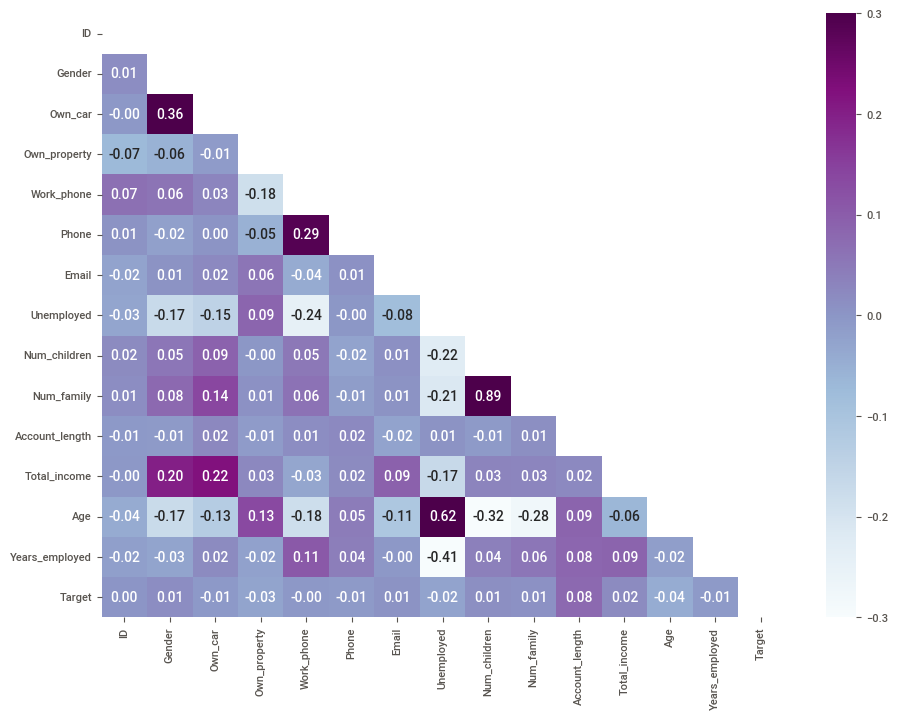

In [16]:
# look at the correlation of features with each other
plt.figure(figsize=(11,8))
corr_matrix = bank.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))
sns.heatmap(lower, annot=True, fmt='.2f', cbar=True, cmap="BuPu",\
           linecolor='white', vmin=-0.3, vmax=0.3, center=0);

<Figure size 1000x1000 with 0 Axes>

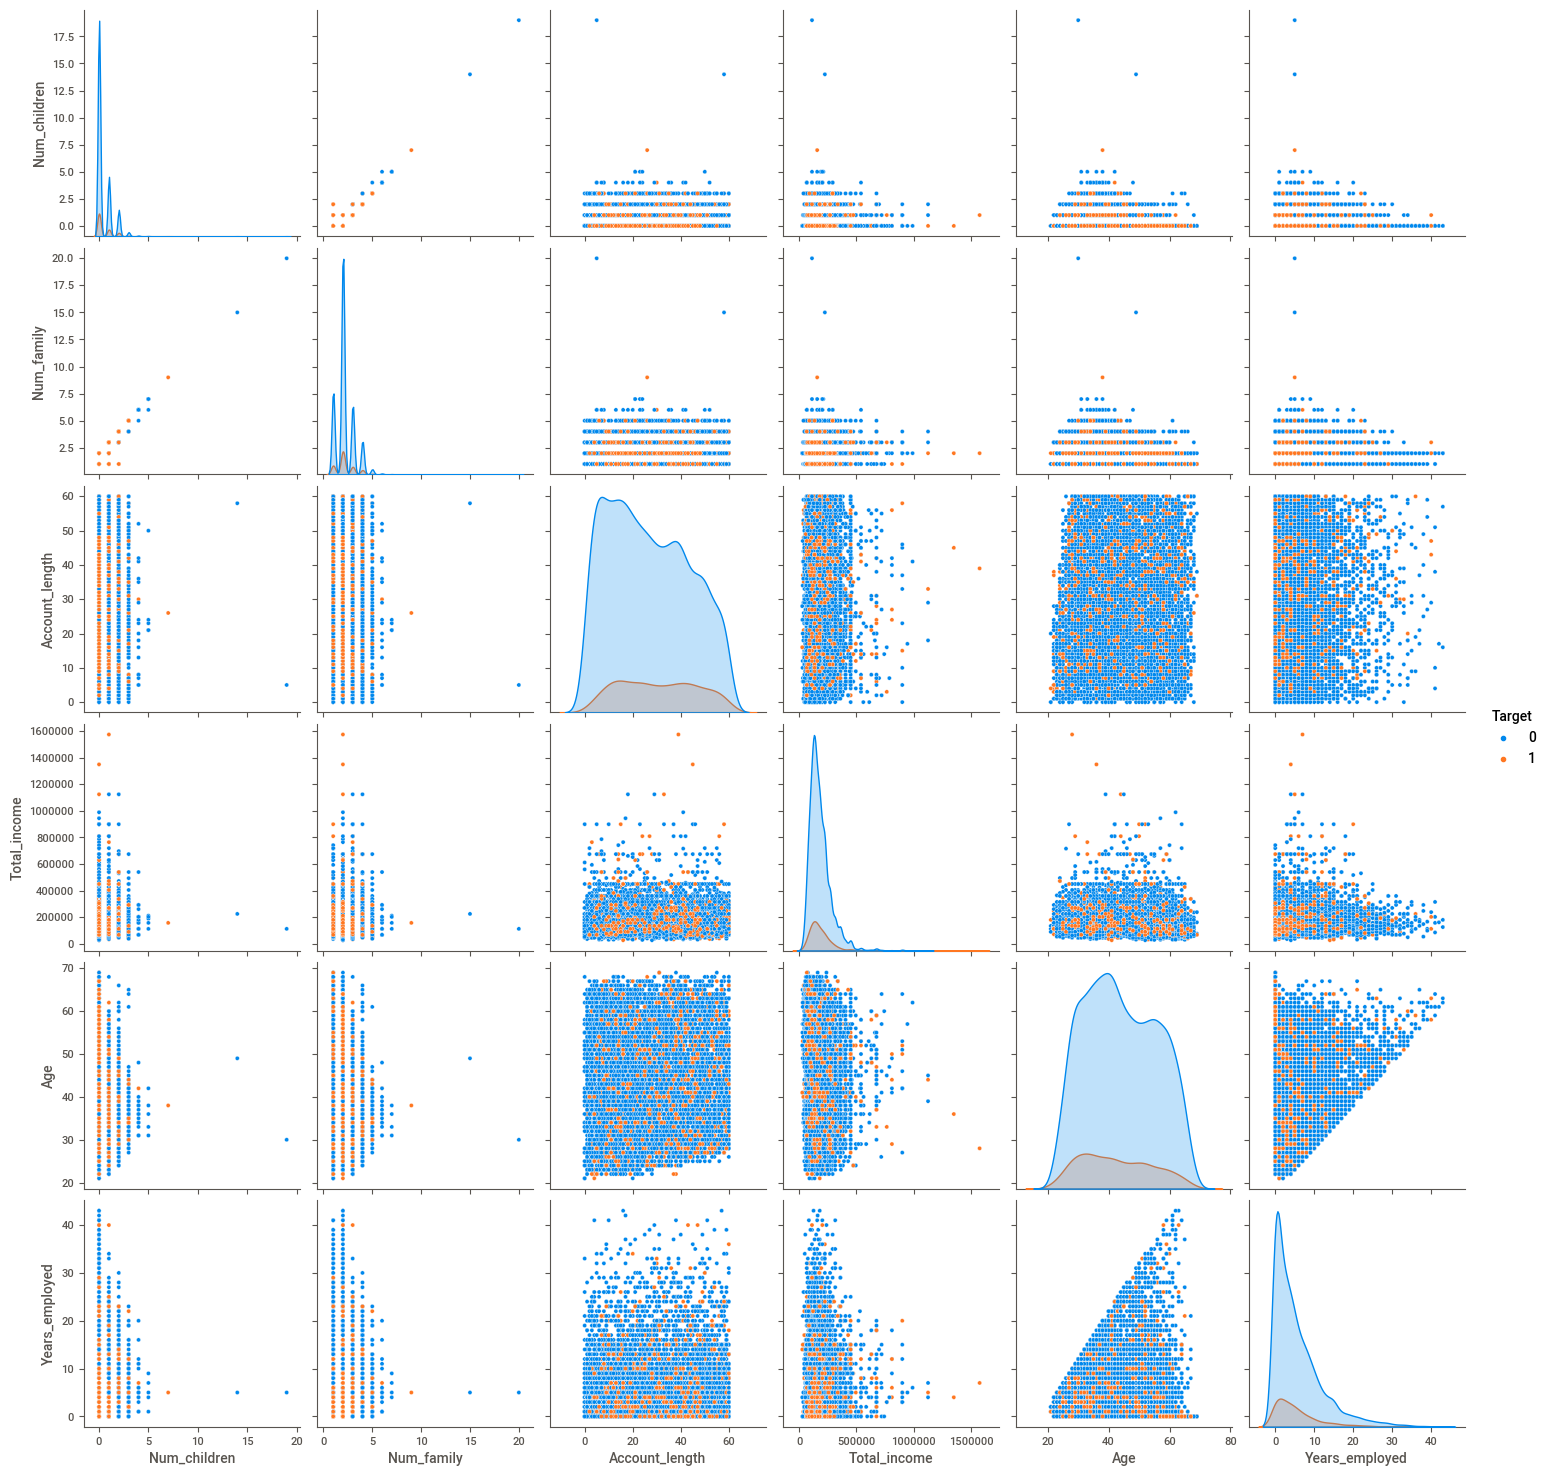

In [17]:
# Look at the correlation of some features with each other in pairs, broken down by the target variable
plt.figure(figsize=(10,10))
sns.pairplot(data=bank, vars=('Num_children', 'Num_family', 'Account_length',
       'Total_income', 'Age', 'Years_employed'), hue='Target', height=2.5);

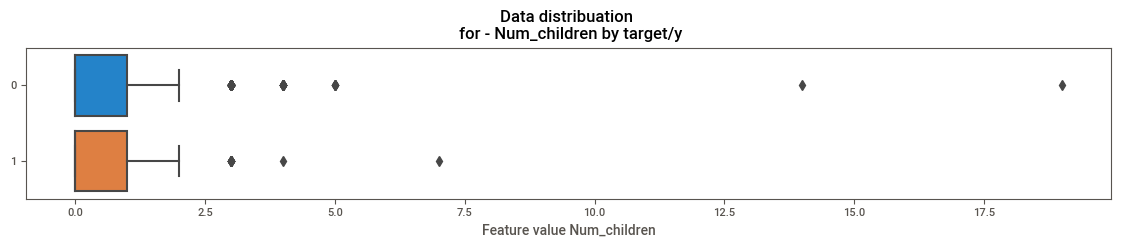

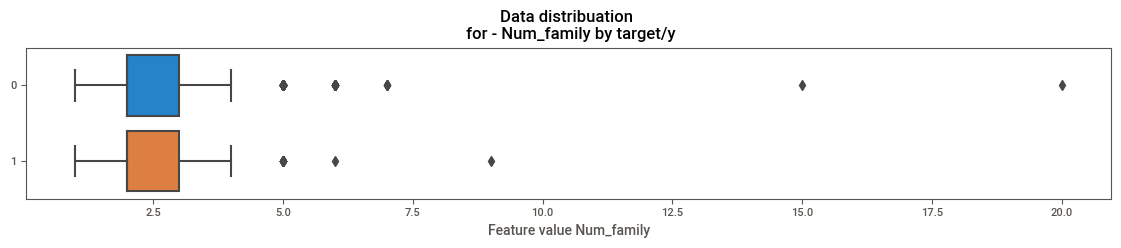

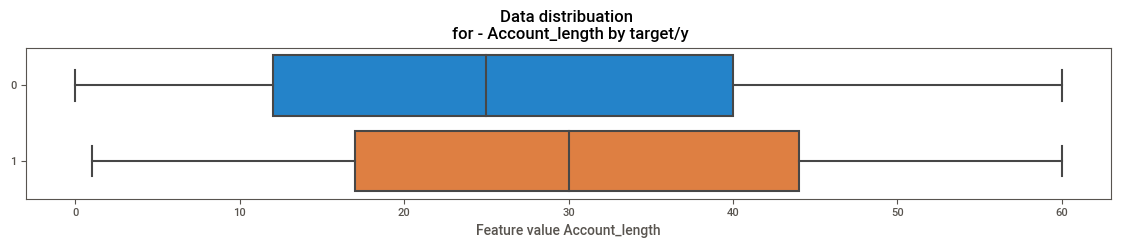

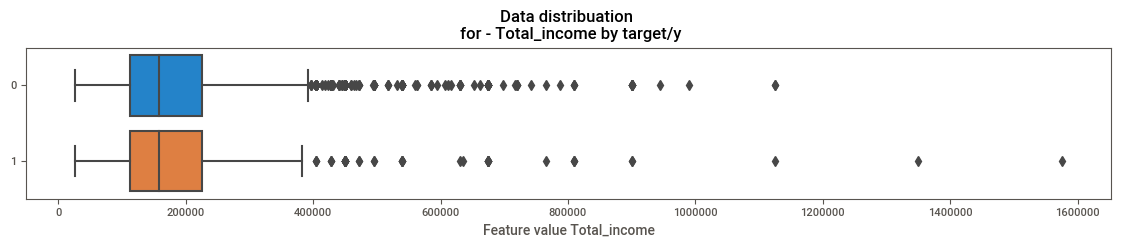

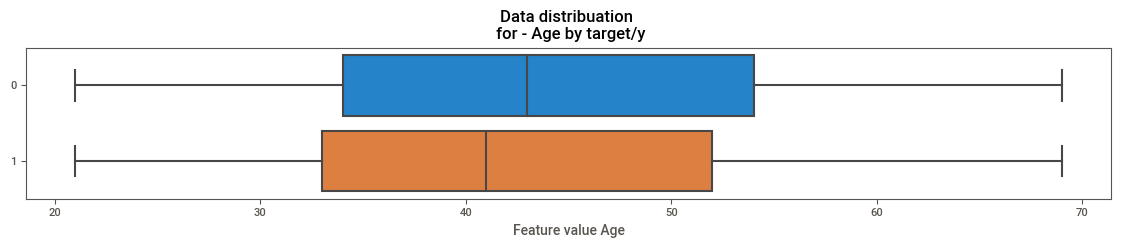

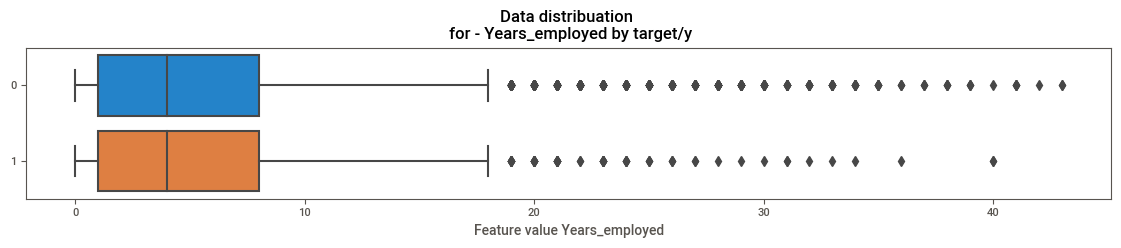

In [18]:
for column in bank.drop(columns = ['ID', 'Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone',
       'Email', 'Unemployed','Income_type',
       'Education_type', 'Family_status', 'Housing_type', 'Occupation_type',
       'Target']).columns:
    fig,ax = plt.subplots(figsize=(14,2))
    ax=sns.boxplot(x=bank[column], y=bank.Target, ax=ax, saturation=0.7,orient='h')
    plt.title('Data distribuation \n for - '+ str(column) + ' by target/y')
    plt.xlabel('Feature value ' + column)
    plt.ylabel('')
    plt.show()

In [19]:
# a function for drawing distribution histograms and range diagrams for numerical features;
def numeric_plots(bank, col, title):
    fig, ax = plt.subplots(figsize = (20, 5))

    sns.histplot(bank[bank['Target']==0][col], label = '0 No risk', color = 'darkblue', ax = plt.subplot(1, 2, 1), alpha=1)
    sns.histplot(bank[bank['Target']==1][col], label = '1 Risk', color = 'orange', ax = plt.subplot(1, 2, 1), alpha=0.7)
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.legend()

    sns.boxplot(y = col, x = 'Target', data = bank, ax = plt.subplot(1, 2, 2))
    #plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(np.arange(2), ('0 - No risk', '1 - Risk'))

    fig.suptitle(title + ' (' + col + ')')
    plt.show()

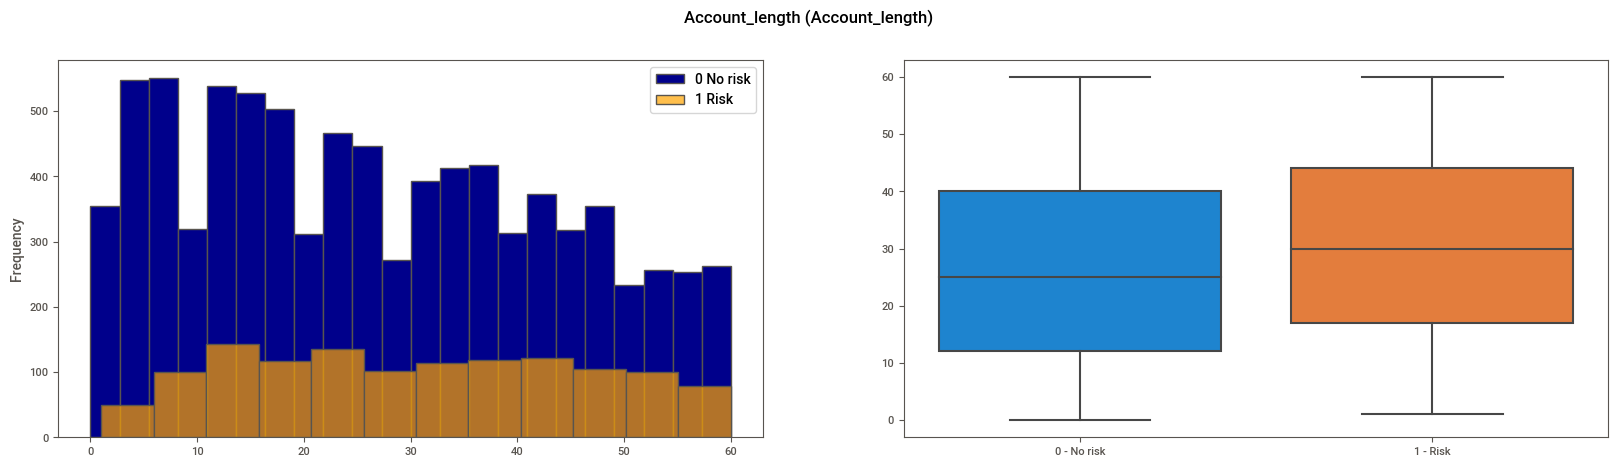

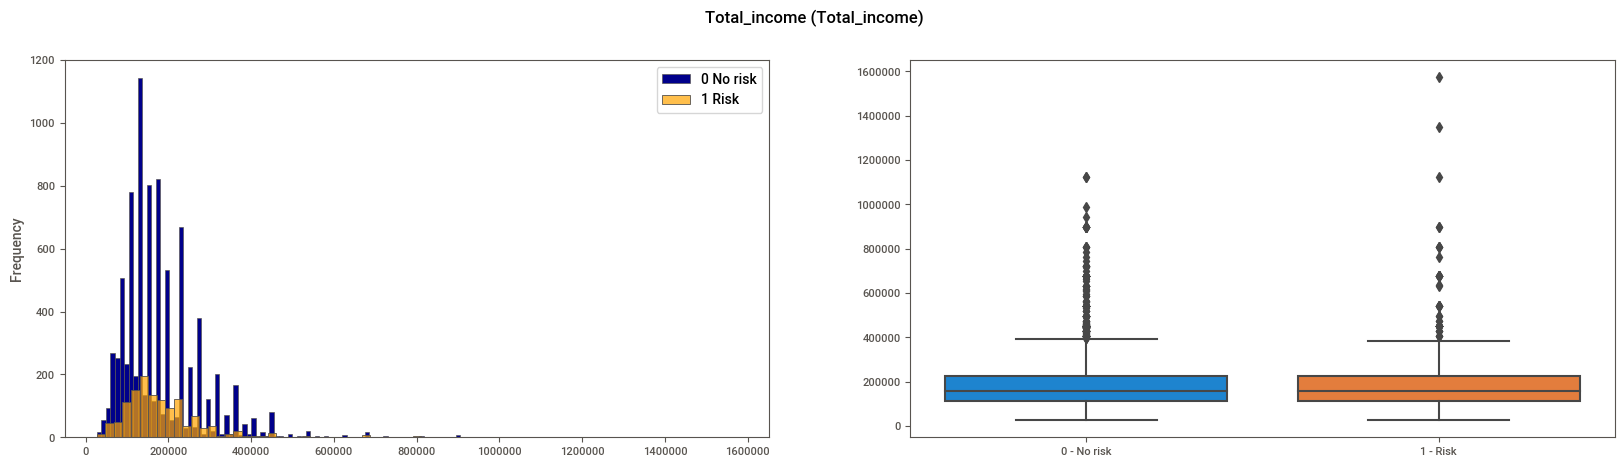

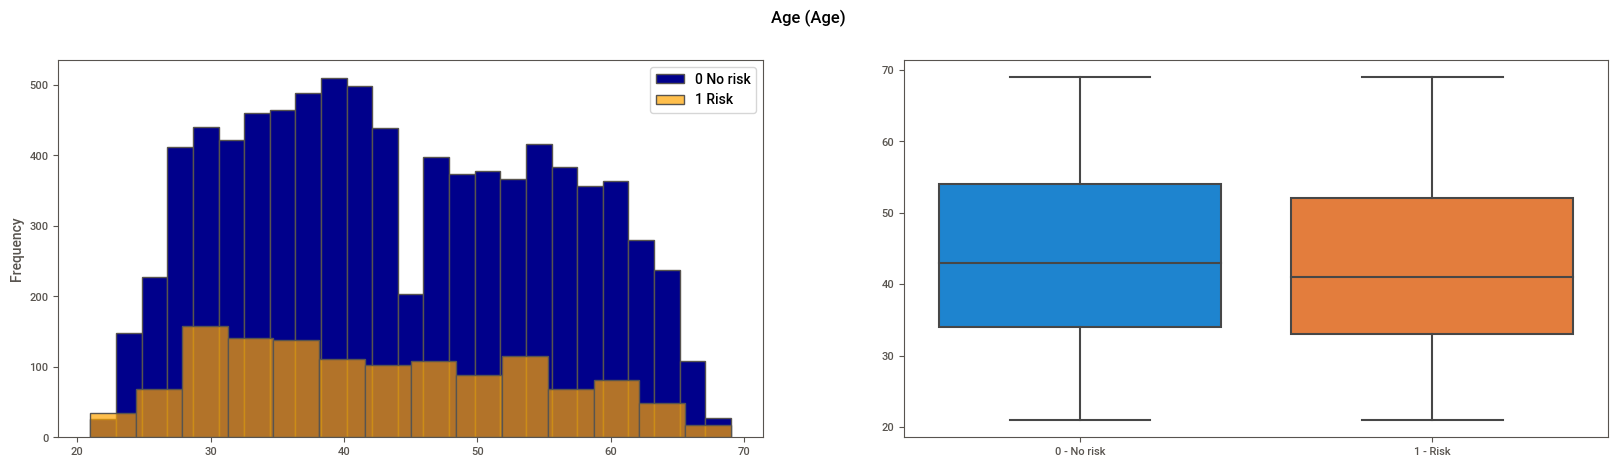

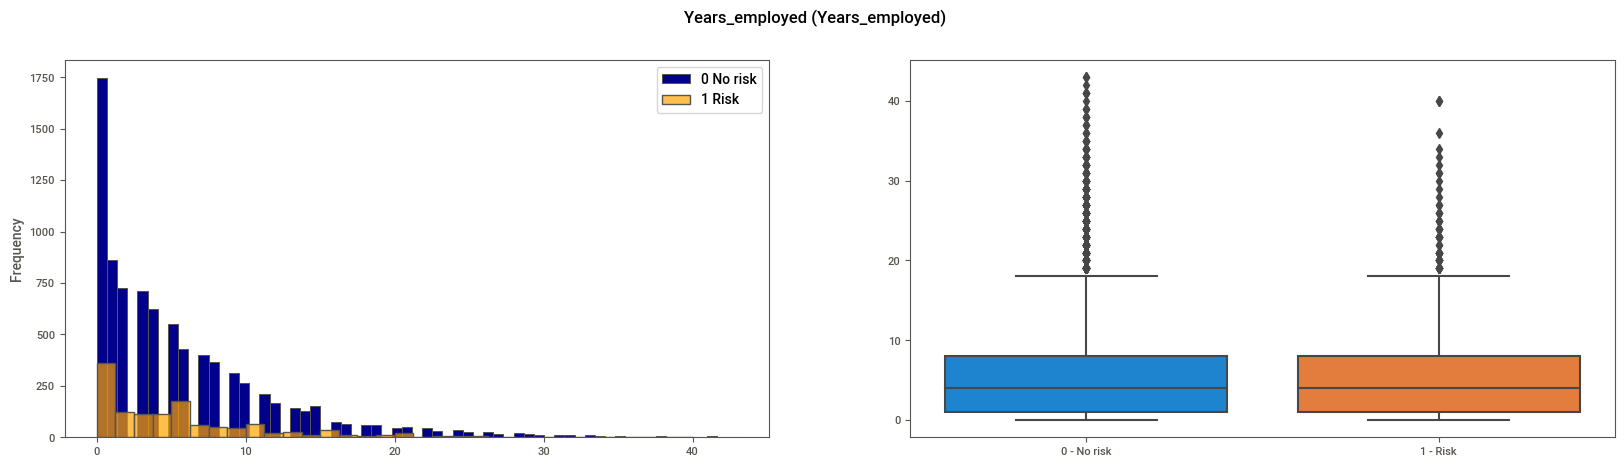

In [20]:
numeric = pd.DataFrame({'col' : bank.drop(columns = ['ID', 'Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone',
       'Email', 'Unemployed','Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type',
       'Target', 'Num_children', 'Num_family']).columns,
                        'title' : bank.drop(columns = ['ID', 'Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone',
       'Email', 'Unemployed','Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type',
       'Target', 'Num_children', 'Num_family']).columns
                       })
for index, row in numeric.iterrows():
    numeric_plots(bank, row[0], row[1])

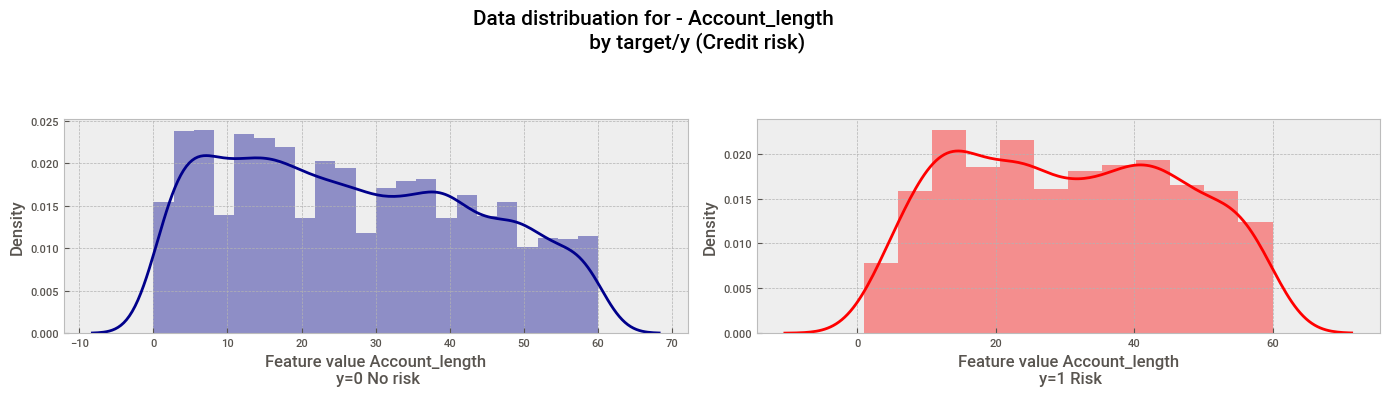

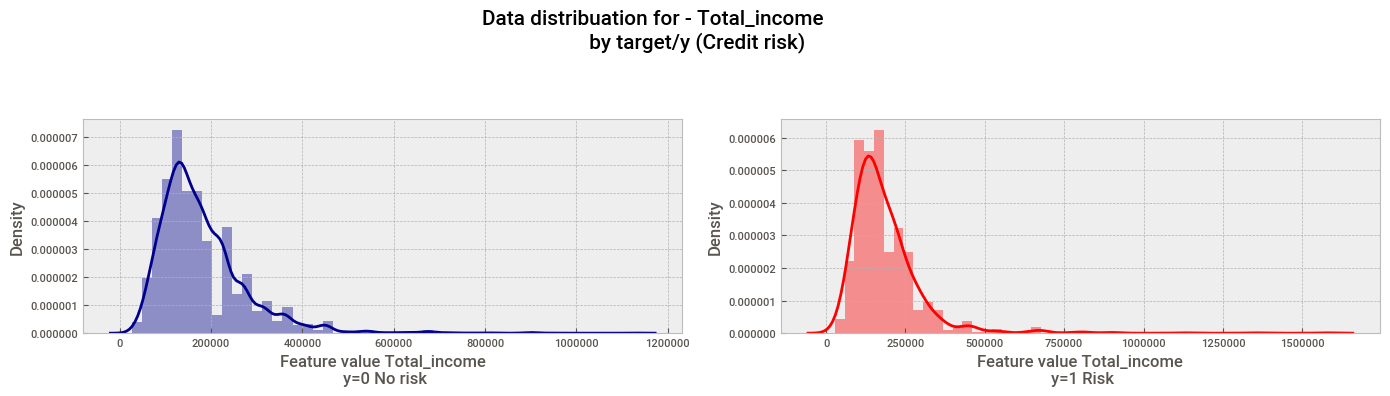

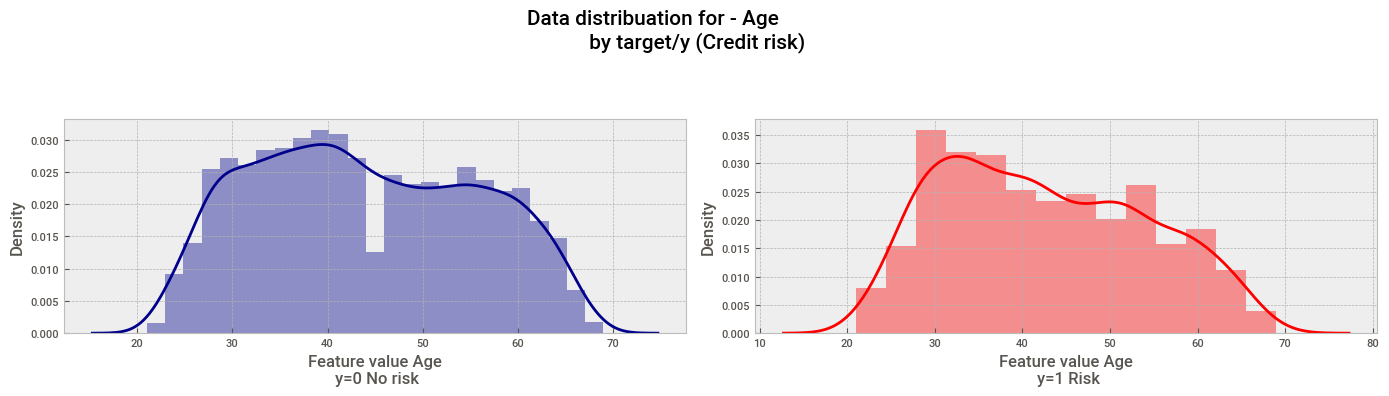

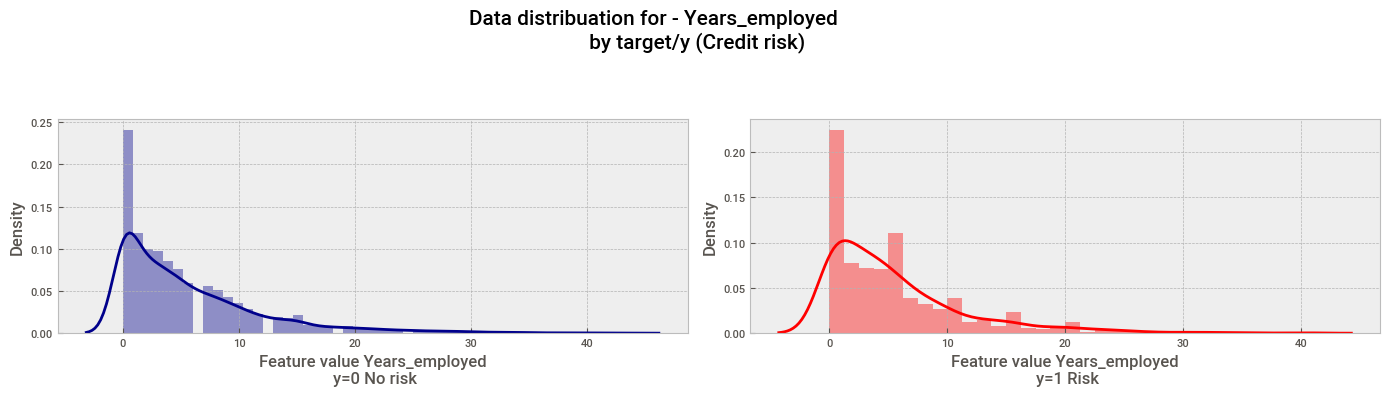

In [21]:
plt.style.use('bmh')
for column in bank.drop(['ID', 'Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone',
       'Email', 'Unemployed','Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type',
       'Target', 'Num_children', 'Num_family'],axis=1).columns:
    fig, ax = plt.subplots(1,2, figsize = (14,4),  tight_layout=True, sharey=False, sharex=False)
    sns.distplot(bank.query('Target == 0')[column].dropna(), hist=True, color='darkblue',ax = ax[0], norm_hist = True)
    sns.distplot(bank.query('Target == 1')[column].dropna(), hist=True, color='red',ax = ax[1], norm_hist = True)
    ax[0].set_title(' \n')
    ax[1].set_title(' \n')
    ax[0].set_xlabel('Feature value '+ str(column)+ '\n y=0 No risk')
    ax[1].set_xlabel('Feature value '+ str(column)+ '\n y=1 Risk')
    plt.suptitle('Data distribuation for - ' + column + '\
                '+ '\n by target/y (Credit risk)', fontsize=15)
    plt.show()

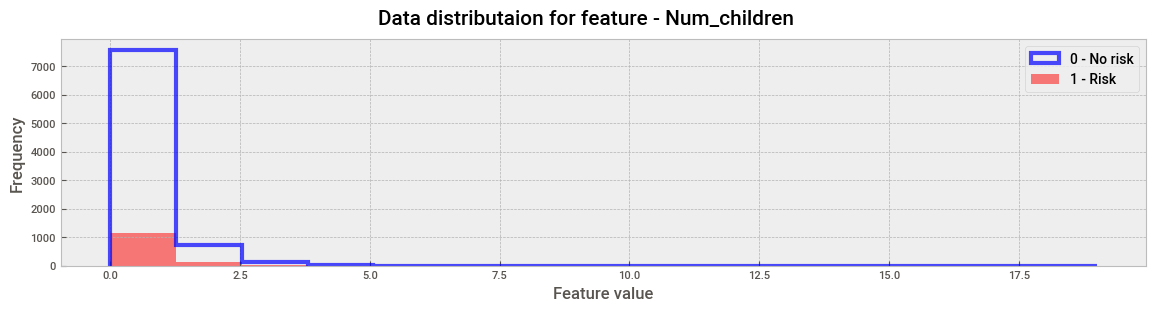

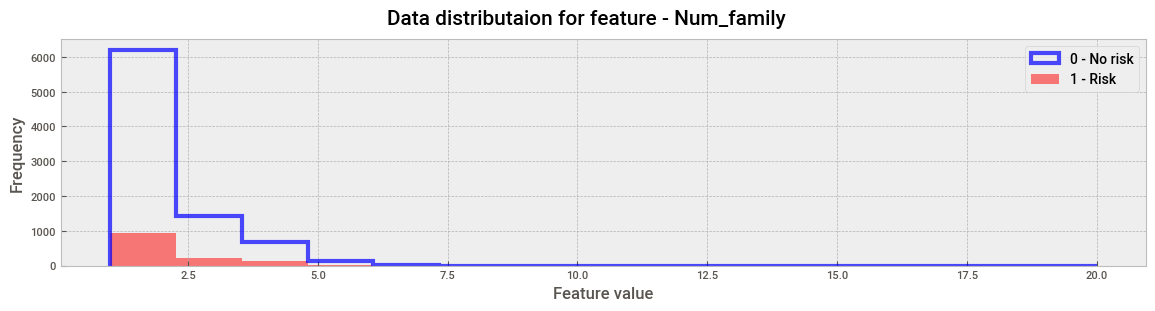

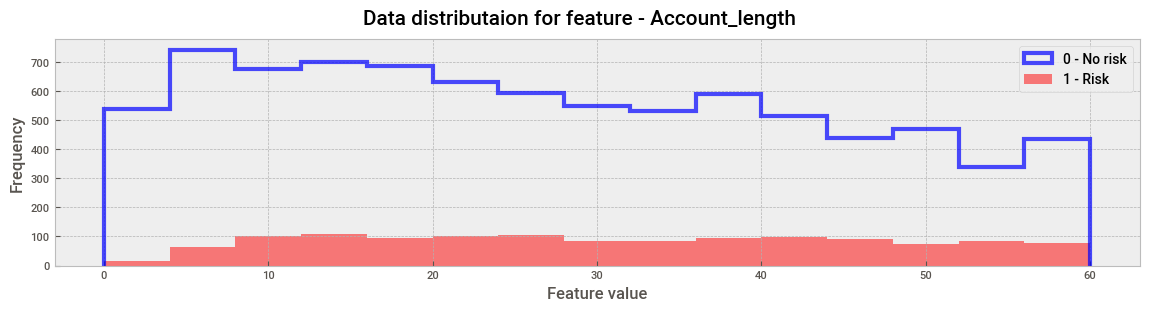

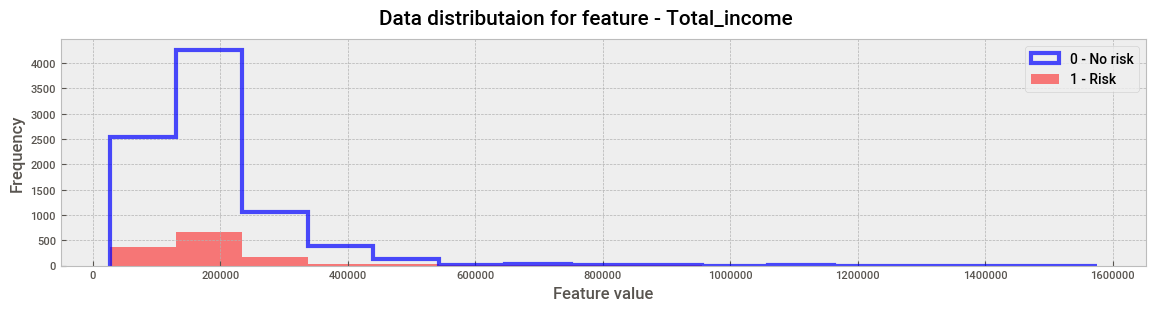

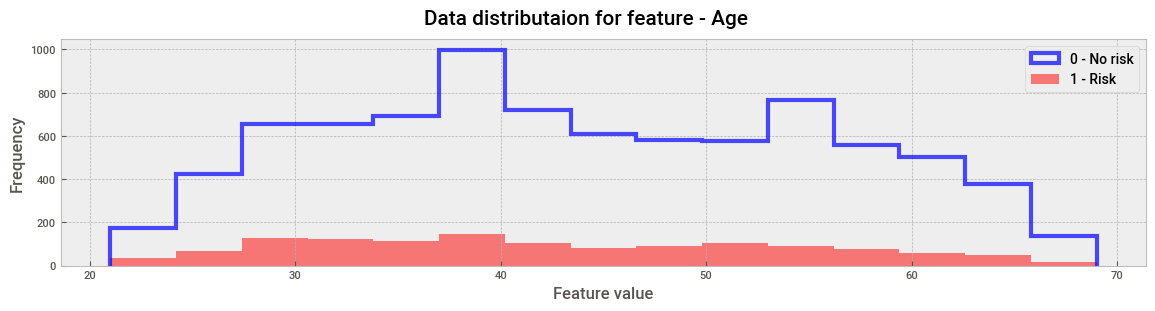

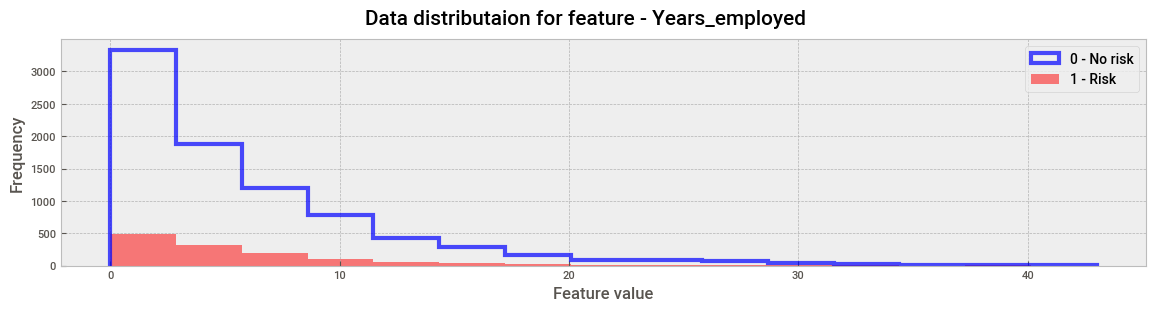

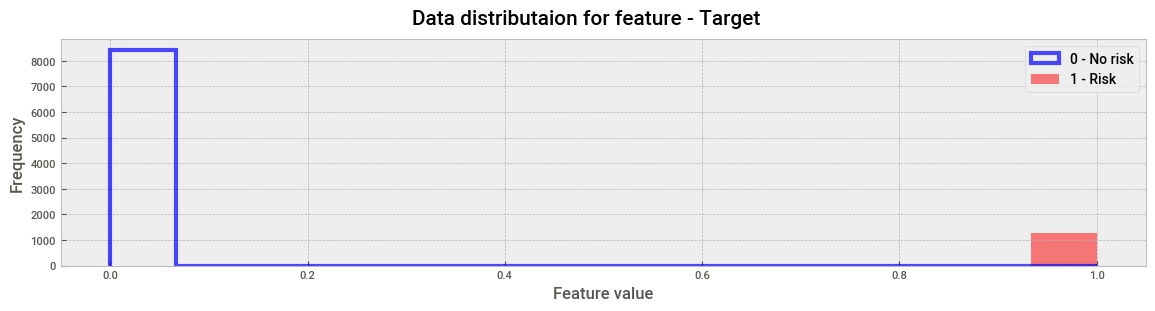

In [22]:
# Visualize by overlaying two samples based on the y (Credit risk) feature, without normalization (density=False)
for column in bank.drop(['ID', 'Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone',
       'Email', 'Unemployed','Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type'
       ],axis=1).columns:
    hist_range=(bank[column].min(), bank[column].max())
    bins=bank[column].nunique()
    ax = bank.query('Target == 0').plot(kind='hist', y=column, histtype='step',\
                                   figsize = (14,3), density=False, range=hist_range, bins=15,\
                                   linewidth=3, alpha=0.7, label='0 - No risk', color='b')
    bank.query('Target == 1').plot(kind='hist', y=column,figsize = (14,3), histtype='stepfilled',\
                              density=False, range= hist_range, bins=15, linewidth=2, alpha=0.5,\
                              label='1 - Risk', ax=ax, color='r', grid=True, legend=True)
    plt.xlabel('Feature value')
    plt.suptitle('Data distributaion for feature - '+ str(column), fontsize=15)
    plt.show()

In [23]:
bank.Target.value_counts()

0    8424
1    1282
Name: Target, dtype: int64

In [24]:
bank.groupby('Target')['Total_income'].median()

Target
0    157500.0
1    157500.0
Name: Total_income, dtype: float64

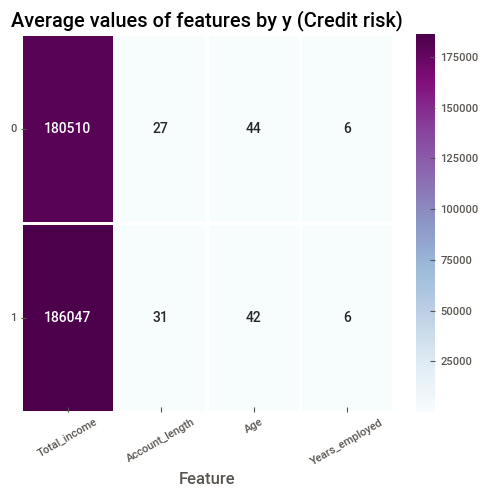

In [25]:
# Look at some features broken down by y (deposit)
plt.figure(figsize = (6,5))
sns.heatmap(data=bank.groupby(['Target'])['Total_income', 'Account_length',\
                                          'Age', 'Years_employed']\
            .mean().round(1).sort_values(by='Target'), annot = True,\
            linewidths=1, linecolor='white',cmap="BuPu", fmt='.0f', annot_kws={"size": 10})
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.title('Average values of features by y (Credit risk)')
plt.ylabel('')
plt.xlabel('Feature')
plt.show()

In [26]:
#bank.query('Target == 0')['Total_income'].mean()
#bank.query('Target == 1')['Total_income'].mean()

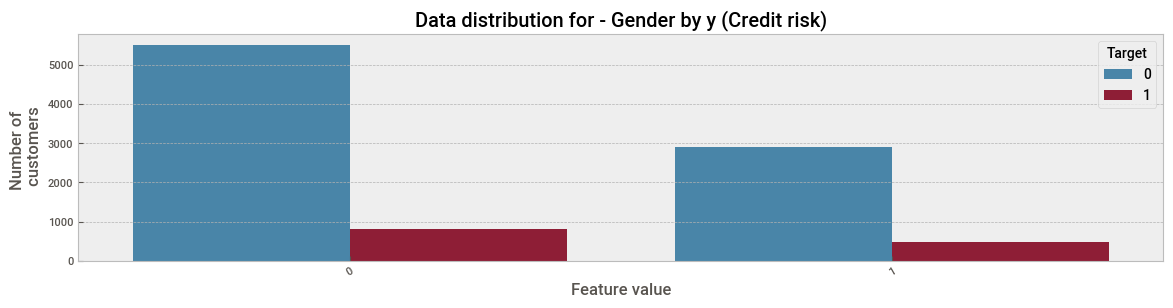

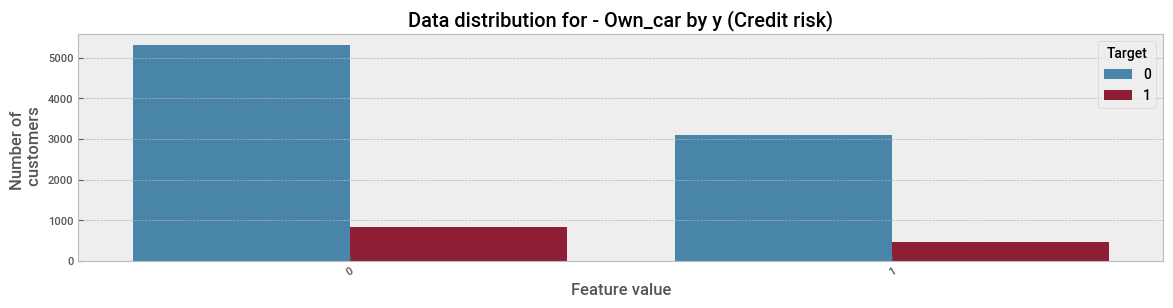

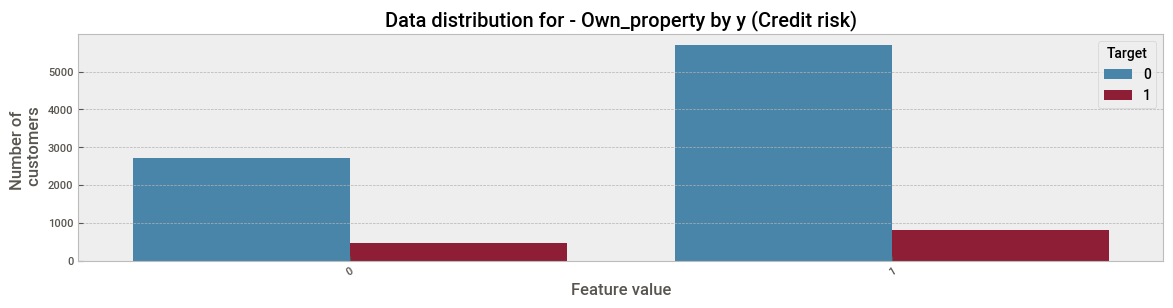

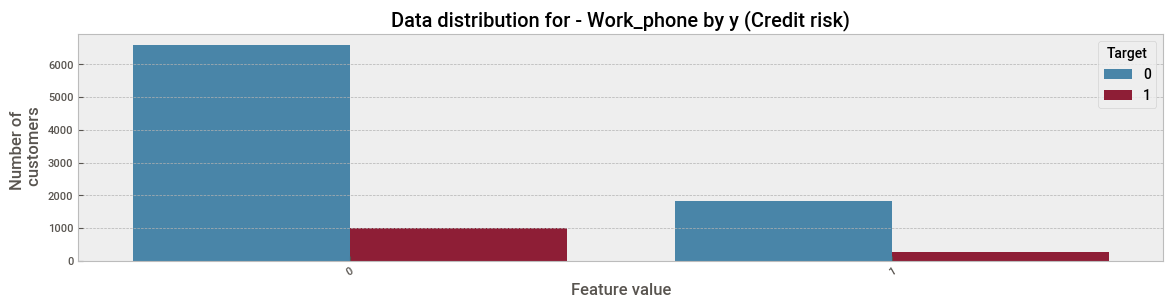

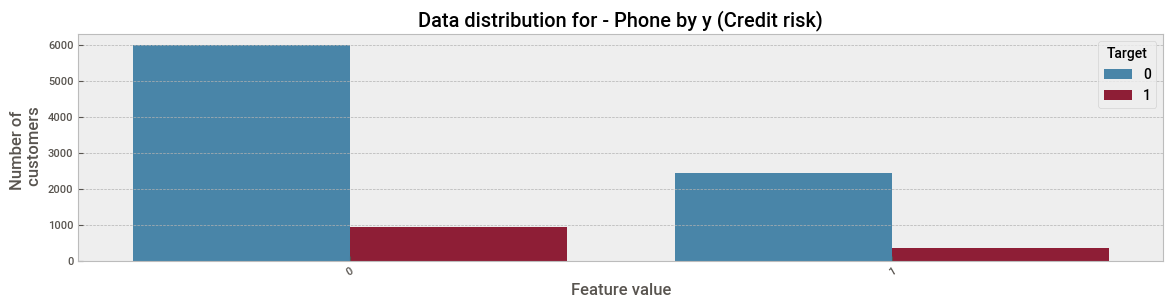

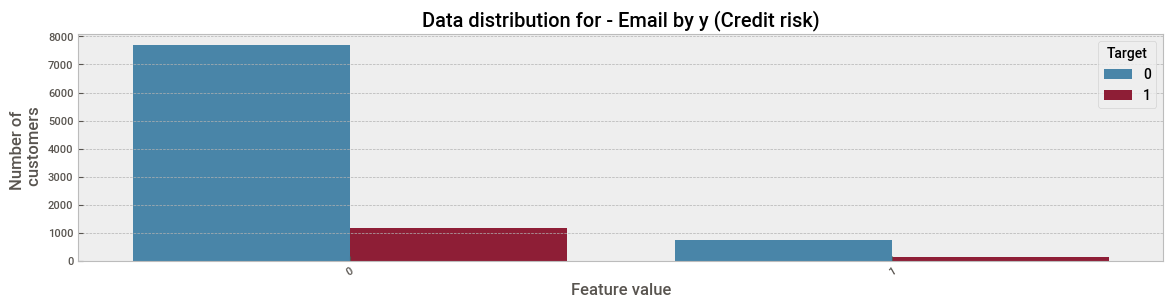

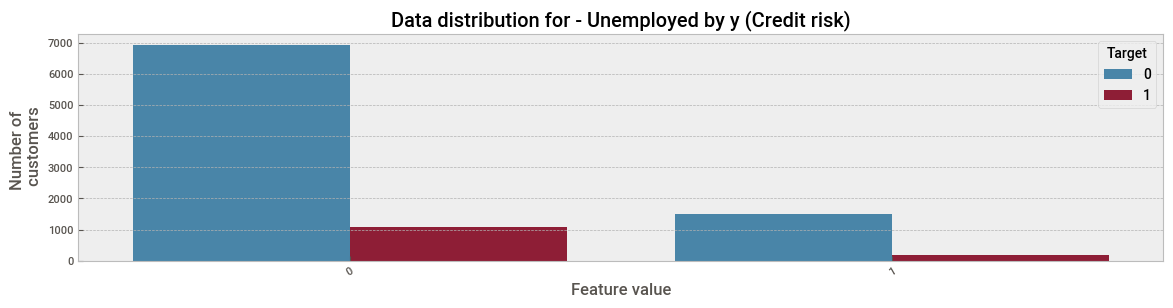

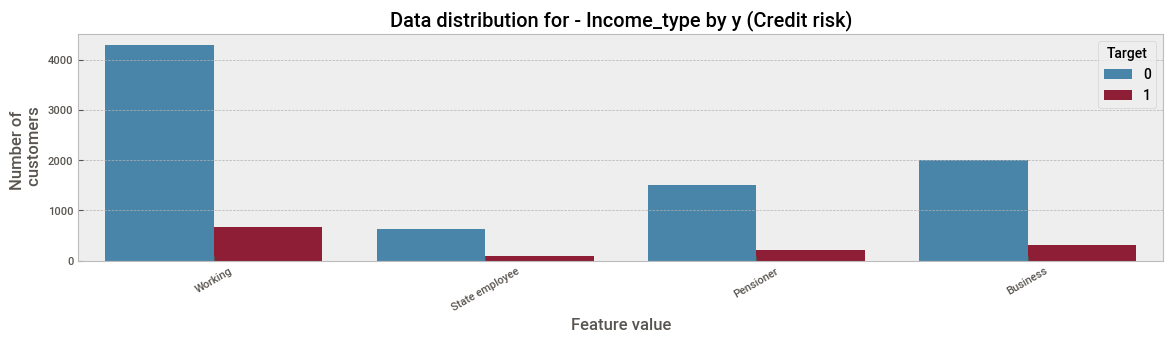

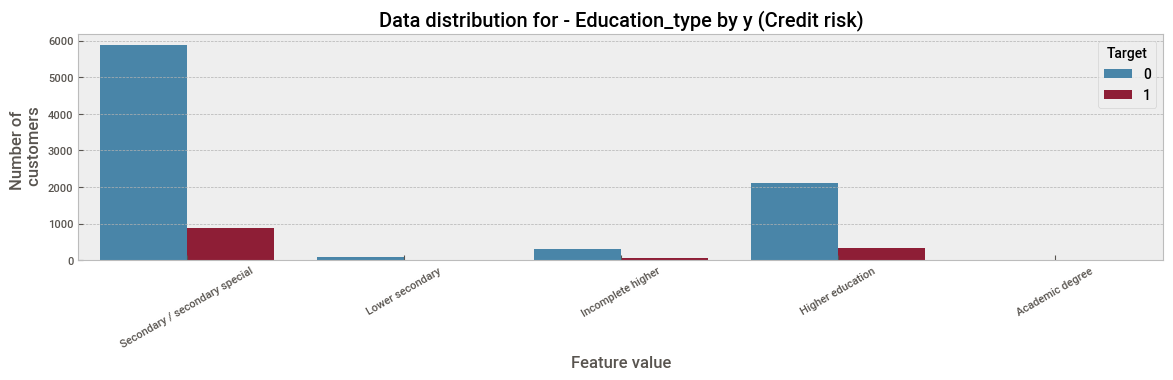

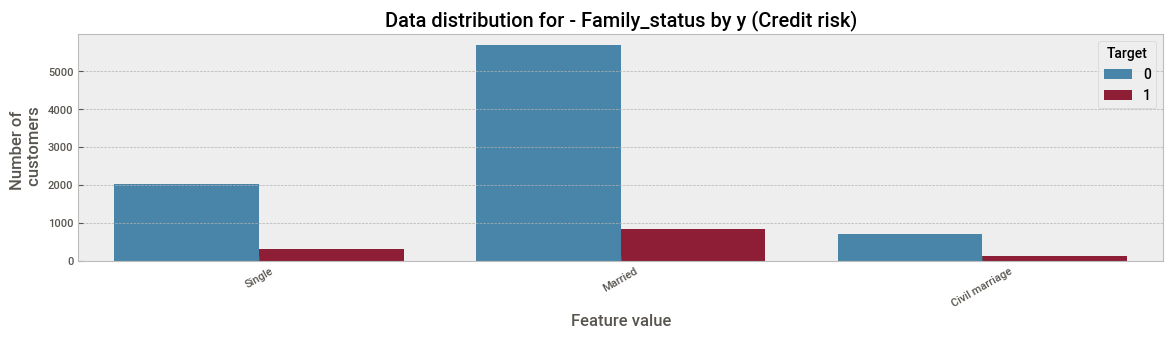

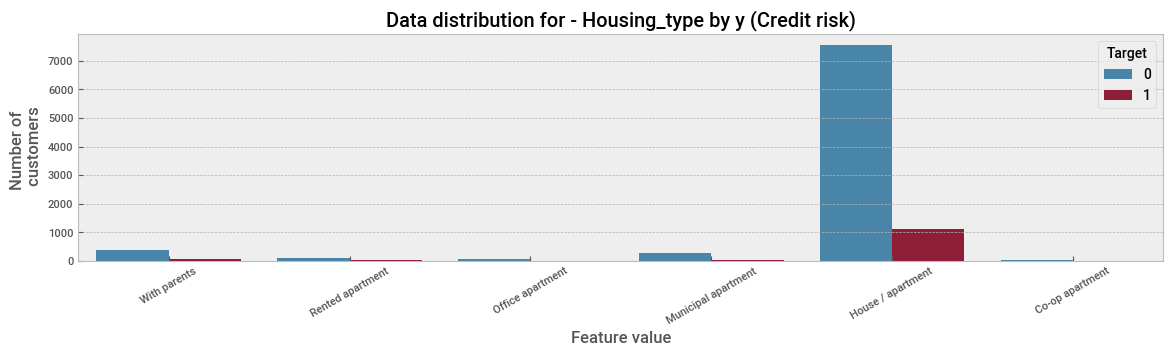

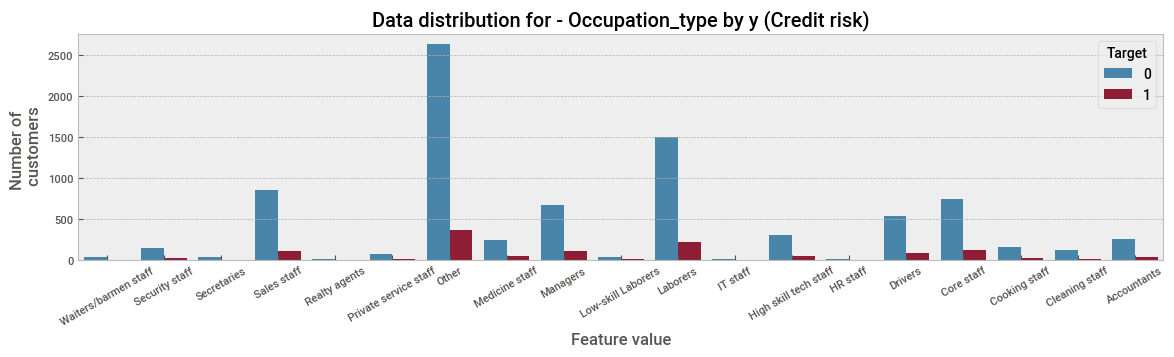

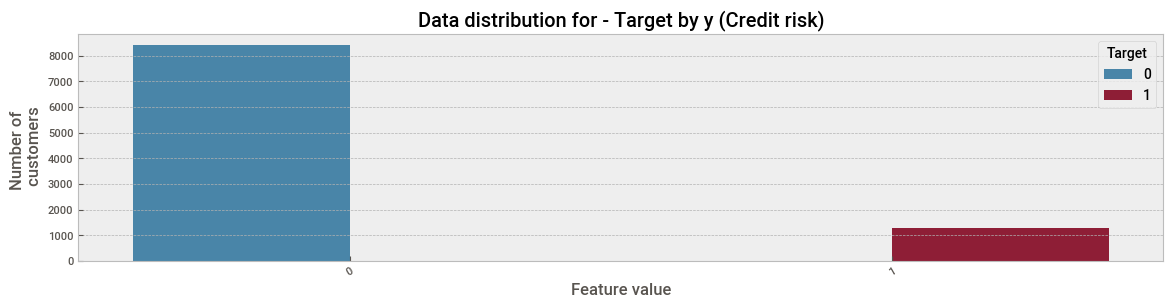

In [27]:
# Reset unnecessary columns and plot using countplot diagram
for column in bank.drop(columns=['ID','Num_children', 'Num_family', 'Account_length',
       'Total_income', 'Age', 'Years_employed']).columns:
    fig, ax = plt.subplots(figsize=(14,3))
    sns.countplot(x=column, hue='Target',data=bank.sort_values(by=column,\
                                    ascending=False), ax=ax, saturation=0.7)
    plt.xticks(rotation=30)
    plt.title('Data distribution for - '+ str(column) + ' by y (Credit risk)')
    plt.ylabel('Number of \n customers')
    plt.xlabel('Feature value')
    plt.show()

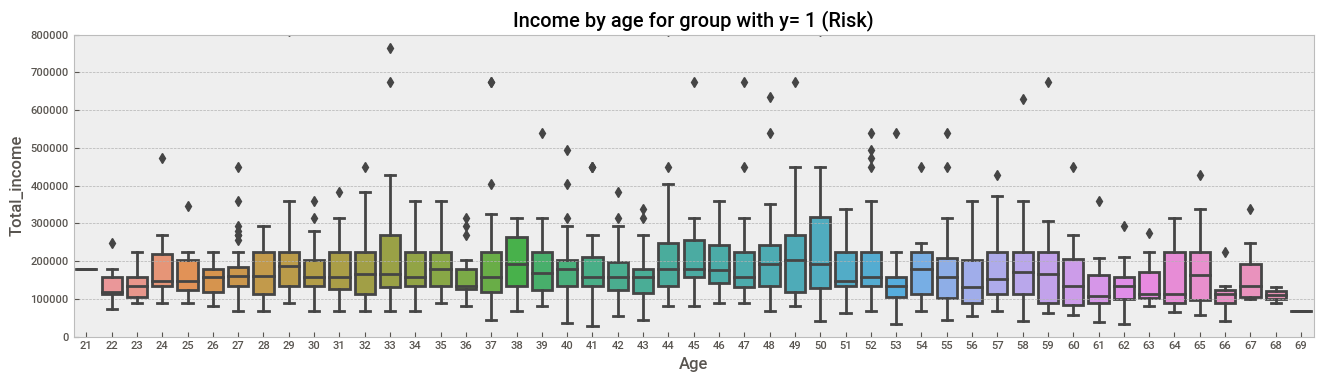

In [28]:
plt.figure(figsize = (16,4))
ax = sns.boxplot(x="Age", y="Total_income", data=bank.query('Target==1'))
plt.title('Income by age for group with y= 1 (Risk)')
ax.set_ylim([0, 800000])
plt.show()

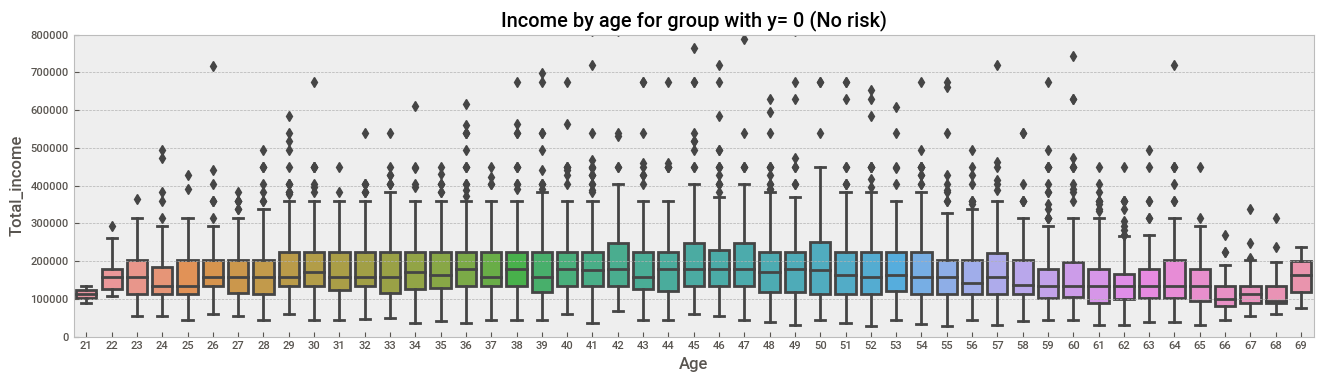

In [29]:
plt.figure(figsize = (16,4))
ax = sns.boxplot(x="Age", y="Total_income", data=bank.query('Target==0'))
plt.title('Income by age for group with y= 0 (No risk)')
ax.set_ylim([0, 800000])
plt.show()

<a id="model"></a>
## 2. Building and training models

<a id="model1"></a>
### 2.1. Data processing for models building

In [30]:
# removing the client number and one of the highly correlated features - the number of children, 
# but leaving the number of family members
bank = bank.drop(columns = ['ID', 'Num_children'], axis=1)

In [31]:
# Define a function that encodes categorical features using the selected method
def encode_func(bank, enc, cols = ['Num_family', 'Account_length',
                                   'Income_type', 'Education_type', 'Family_status',
                                   'Housing_type', 'Occupation_type']):
    bank_enc = bank.copy()
    bank_enc[cols]= enc.fit_transform(bank_enc[cols])
    return bank_enc

In [32]:
# Encode the categorycal features
from category_encoders import CountEncoder
enc = CountEncoder()
bank_enc = encode_func(bank, enc)
bank_enc.head()

Gender  Own_car  Own_property  Work_phone  Phone  Email  Unemployed  \
0  1       1        1             1           0      0      0            
1  1       1        1             0           0      0      0            
2  0       0        1             0           1      1      0            
3  0       0        1             0           0      0      1            
4  1       1        1             1           1      1      0            

   Num_family  Account_length  Total_income  Age  Years_employed  Income_type  \
0  2           15              427500        33   12              4960          
1  2           29              112500        59   3               4960          
2  1           4               270000        52   8               2312          
3  1           20              283500        62   0               1712          
4  2           5               270000        46   2               4960          

   Education_type  Family_status  Housing_type  Occupation_type  Target  
0  2455            835            144           2993             1       
1  6760            6529           8682          182              0       
2  6760            2342           8682          959              0       
3  2455            2342           8682          2993             0       
4  2455            6529           8682          300              0

In [33]:
bank_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9706 entries, 0 to 9708
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           9706 non-null   int64
 1   Own_car          9706 non-null   int64
 2   Own_property     9706 non-null   int64
 3   Work_phone       9706 non-null   int64
 4   Phone            9706 non-null   int64
 5   Email            9706 non-null   int64
 6   Unemployed       9706 non-null   int64
 7   Num_family       9706 non-null   int64
 8   Account_length   9706 non-null   int64
 9   Total_income     9706 non-null   int32
 10  Age              9706 non-null   int32
 11  Years_employed   9706 non-null   int32
 12  Income_type      9706 non-null   int64
 13  Education_type   9706 non-null   int64
 14  Family_status    9706 non-null   int64
 15  Housing_type     9706 non-null   int64
 16  Occupation_type  9706 non-null   int64
 17  Target           9706 non-null   int64
dtypes: int32

In [34]:
X = bank_enc.drop(columns=['Target'], axis=1)
y = bank_enc['Target']

In [35]:
y.value_counts(normalize=True).round(2)

0    0.87
1    0.13
Name: Target, dtype: float64

In [36]:
# Let's use the method to balance unbalanced classes
over = SMOTE(random_state=42)
X, y = over.fit_resample(X, y)

In [37]:
y.value_counts(normalize=True).round(2)

1    0.5
0    0.5
Name: Target, dtype: float64

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42, shuffle=True)
#stratify = bank['Target'],

In [39]:
print("X_train shape is",X_train.shape)
print("y_train shape is",y_train.shape)

print("X_test shape is ",X_test.shape)
print("y_test shape is",y_test.shape)

X_train shape is (13478, 17)
y_train shape is (13478,)
X_test shape is  (3370, 17)
y_test shape is (3370,)


In [40]:
#numeric = ['Account_length','Total_income', 'Age', 'Years_employed']
#scaler = StandardScaler()
#scaler.fit(X_train[numeric])
#X_train[numeric] = scaler.transform(X_train[numeric])
#X_test[numeric] = scaler.transform(X_test[numeric])

In [41]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.        , 0.        , 1.        , ..., 1.        , 1.        ,
        0.12092711],
       [1.        , 1.        , 1.        , ..., 0.26466456, 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.25730601],
       ...,
       [0.        , 0.        , 1.        , ..., 0.26466456, 1.        ,
        0.31676184],
       [0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.28888142],
       [0.        , 0.        , 1.        , ..., 1.        , 1.        ,
        0.57339604]])

In [42]:
y_train.value_counts(normalize=True).round(2)

0    0.5
1    0.5
Name: Target, dtype: float64

In [43]:
y_test.value_counts(normalize=True).round(2)

1    0.5
0    0.5
Name: Target, dtype: float64

In [44]:
# Create a new small dataframe with the final results
columns = ['Accuracy', 'ROC-AUC', 'F1 score']
models = ['DummyClassifier', 'CatBoostClassifier', 'RandomForestClassifier',
          'DecisionTreeClassifier', 'KerasSequential']
result = pd.DataFrame(columns=columns, index = models)
result

Accuracy ROC-AUC F1 score
DummyClassifier         NaN      NaN     NaN    
CatBoostClassifier      NaN      NaN     NaN    
RandomForestClassifier  NaN      NaN     NaN    
DecisionTreeClassifier  NaN      NaN     NaN    
KerasSequential         NaN      NaN     NaN

<a id="model2"></a>
### 2.2. Selection of parameters and training of the DummyClassifier model

In [45]:
# At the very beginning, we look at the forecast of the model built using DummyClassifier
from sklearn.dummy import DummyClassifier
model_dc = DummyClassifier()
#strategy='median'
model_dc.fit(X_train, y_train)
y_train_pred_dc = model_dc.predict(X_train)

predictions_dc = model_dc.predict(X_test)
probabilities_dc = model_dc.predict_proba(X_test)
print('-------------------------------------------------------------------------------------')
print("Accuracy score модели DummyClassifier for test (balanced): {:.2f}"\
      .format(accuracy_score(y_test, predictions_dc)))
result.loc['DummyClassifier','Accuracy'] = accuracy_score(y_test, predictions_dc).round(2)

-------------------------------------------------------------------------------------
Accuracy score модели DummyClassifier for test (balanced): 0.50


  -------------------------------------------------
   Roc-Auc Score is: 0.500
  -------------------------------------------------


<Figure size 1000x600 with 0 Axes>

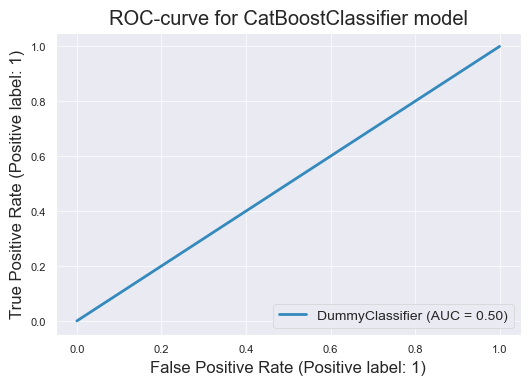

In [46]:
# look at ROC-AUC in graphical representation
bc = BinaryClassification(y_test, probabilities_dc, labels=["Class 1"])
print('  -------------------------------------------------')
print('   Roc-Auc Score is: {:.3f}'.format(roc_auc_score(y_test.values, probabilities_dc[:,1])))
result.loc['DummyClassifier','ROC-AUC'] = roc_auc_score(y_test.values, probabilities_dc[:,1]).round(2)
print('  -------------------------------------------------')
plt.figure(figsize=(10,6))
metrics.plot_roc_curve(model_dc, X_test, y_test) 
plt.title('ROC-curve for CatBoostClassifier model')
plt.show()

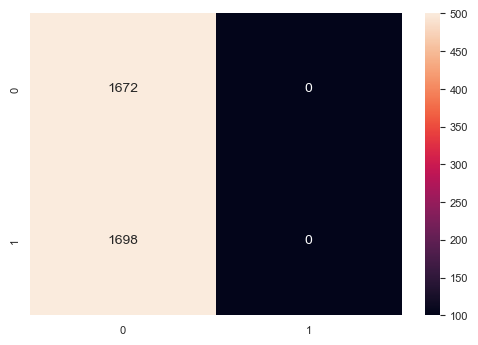

In [47]:
# Visualize the error matrix of the constructed model by class
confusionMatrix = confusion_matrix(y_test,predictions_dc)
sns.heatmap(confusionMatrix,annot=True,fmt='d', vmin=100, vmax=500);
#vmin=200, vmax=1200

In [48]:
# Display the main metrics in `Classification_report`
print('----------------------------------------------------------------------------')
print('Сlassification_report for model DummyClassifier:')
print('-----------------------------------------------------------------------------')
print(classification_report(y_test,predictions_dc))
F1Score_dc = f1_score(y_test, predictions_dc, average='micro') #it can be : binary,macro,weighted,samples
result.loc['DummyClassifier','F1 score'] = f1_score(y_test, predictions_dc, average='micro').round(2)
#F1Score_dc

----------------------------------------------------------------------------
Сlassification_report for model DummyClassifier:
-----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      1672
           1       0.00      0.00      0.00      1698

    accuracy                           0.50      3370
   macro avg       0.25      0.50      0.33      3370
weighted avg       0.25      0.50      0.33      3370



<a id="model3"></a>
### 2.3. Selection of parameters and training of the CatBoostClassifier model

In [49]:
#cat_features = ['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone',
#       'Email', 'Unemployed', 'Num_family','Income_type',
#      'Education_type', 'Family_status', 'Housing_type', 'Occupation_type',]

In [50]:
# let's find the best hyperparameters for the model CatBoostClassifier

#model_cb = CatBoostClassifier(random_seed=42, verbose =10) #auto_class_weights='SqrtBalanced')
#                              
#scorer = make_scorer(accuracy_score)
#params = {'depth': (4,6,8),
#          'learning_rate' : [0.01,0.05],
#          'iterations'    : [100,250,500],
#          #'leaf_estimation_iterations': [4],
#          #'eval_metric': ['F1', 'AUC'] 
#          'custom_metric' : ['TotalF1', 'AUC']
#         }
#grid = GridSearchCV(estimator=model_cb, param_grid = params,\
#                    #scoring= custom_metric,\
#                    cv = 5, n_jobs=-1, verbose =2)
##grid.fit(X_train, y_train)
#print(" Results from Grid Search ")
#print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
#print("\n The best score across ALL searched params:\n", grid.best_score_)
#print("\n The best parameters across ALL searched params:\n", grid.best_params_)    

#Results from Grid Search 
#
# The best estimator across ALL searched params:
# <catboost.core.CatBoostClassifier object at 0x0000017103830CD0>
#
# The best score across ALL searched params:
# 0.8783204417456218
#
# The best parameters across ALL searched params:
# {'custom_metric': 'TotalF1', 'depth': 8, 'iterations': 500, 'learning_rate': 0.05}

In [51]:
model_cb = CatBoostClassifier(verbose=100, iterations=500, \
                              custom_metric = ['TotalF1'],\
                              #auto_class_weights='SqrtBalanced',
                              depth = 8, learning_rate =0.05,\
                              random_seed=42)

model_cb.fit(X_train,y_train,eval_set=(X_test,y_test),\
             use_best_model=True, plot=True)

print(model_cb.get_best_score())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6789359	test: 0.6801218	best: 0.6801218 (0)	total: 145ms	remaining: 1m 12s
100:	learn: 0.3753336	test: 0.4088708	best: 0.4088708 (100)	total: 916ms	remaining: 3.62s
200:	learn: 0.3105302	test: 0.3649233	best: 0.3649233 (200)	total: 1.74s	remaining: 2.58s
300:	learn: 0.2663308	test: 0.3383571	best: 0.3383571 (300)	total: 2.57s	remaining: 1.7s
400:	learn: 0.2339384	test: 0.3266371	best: 0.3266371 (400)	total: 3.34s	remaining: 825ms
499:	learn: 0.2093435	test: 0.3188975	best: 0.3188975 (499)	total: 4.11s	remaining: 0us

bestTest = 0.3188974825
bestIteration = 499

{'learn': {'Logloss': 0.2093435064383429, 'TotalF1': 0.9318939361445807}, 'validation': {'Logloss': 0.3188974824615794, 'TotalF1': 0.8670835550578978}}


In [52]:
X.head(1)

Gender  Own_car  Own_property  Work_phone  Phone  Email  Unemployed  \
0  1       1        1             1           0      0      0            

   Num_family  Account_length  Total_income  Age  Years_employed  Income_type  \
0  2           15              427500        33   12              4960          

   Education_type  Family_status  Housing_type  Occupation_type  
0  2455            835            144           2993

In [53]:
# Analyze the feature importance 
feature_importance_cb = pd.DataFrame({'feature_importance':model_cb.feature_importances_,\
                                   'feature_name': X_test.dtype.names}).sort_values(by=['feature_importance'], 
                                    ascending=False)
feature_importance_cb.to_csv(index=False)
feature_importance_cb

feature_importance feature_name
16  37.024900           None       
12  17.234617           None       
14  7.713035            None       
9   6.319741            None       
8   5.479620            None       
13  4.337472            None       
10  4.145665            None       
11  2.929283            None       
7   2.642945            None       
6   2.093233            None       
2   2.043707            None       
1   1.709013            None       
4   1.633026            None       
0   1.597026            None       
3   1.356621            None       
15  1.066014            None       
5   0.674083            None

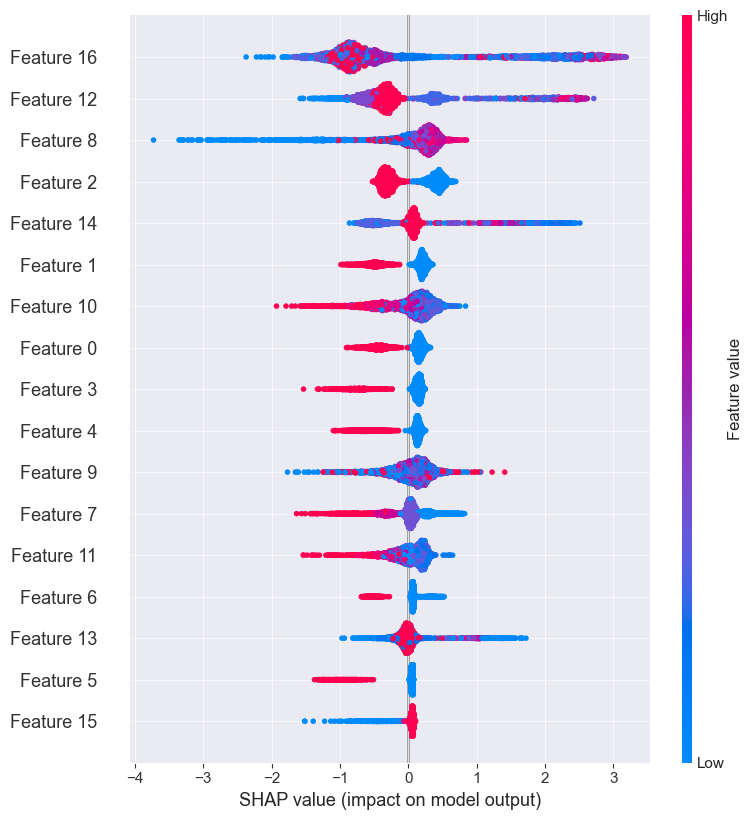

In [54]:
import shap
explainer = shap.TreeExplainer(model_cb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

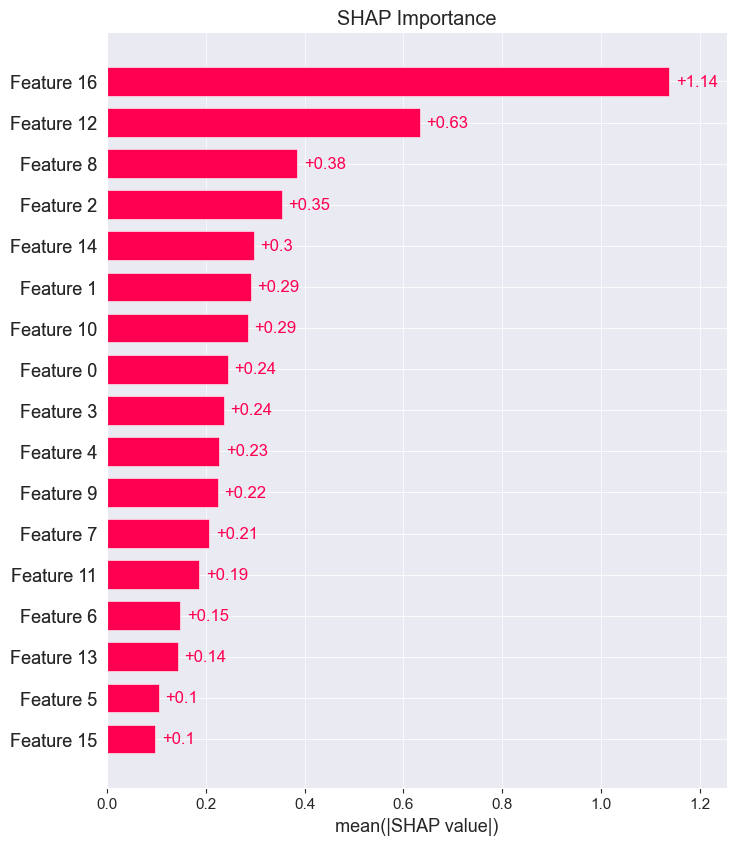

In [55]:
explainer = shap.Explainer(model_cb)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
#fig = plt.figure(figsize=(12, 6))
#plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
#plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('SHAP Importance')
shap.plots.bar(shap_values, max_display=X_test.shape[0])

In [56]:
# Additionally, we will calculate a metric `Accuracy`
predictions_cb = model_cb.predict(X_test)
probabilities_cb = model_cb.predict_proba(X_test)
print('-------------------------------------------------------------------------------------')
print("Accuracy score for model CatBoostClassifier for test (balanced): {:.2f}"\
      .format(accuracy_score(y_test, predictions_cb)))
result.loc['CatBoostClassifier','Accuracy'] = accuracy_score(y_test, predictions_cb).round(2)

-------------------------------------------------------------------------------------
Accuracy score for model CatBoostClassifier for test (balanced): 0.86


In [57]:
# ROC-AUC 
bc = BinaryClassification(y_test, probabilities_cb, labels=["Class 1"])
print('  -------------------------------------------------')
print('   Roc-Auc Score is: {:.3f}'.format(roc_auc_score(y_test, probabilities_cb[:,1])))
result.loc['CatBoostClassifier','ROC-AUC'] = roc_auc_score(y_test, probabilities_cb[:,1]).round(2)

  -------------------------------------------------
   Roc-Auc Score is: 0.931


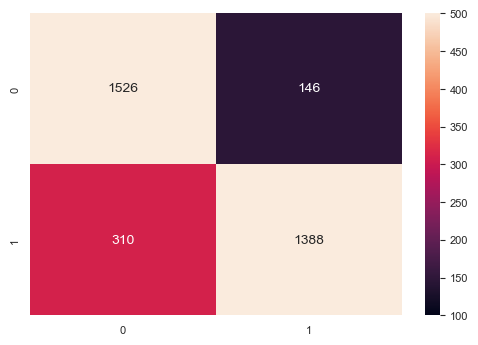

In [58]:
# Error matrix:
confusionMatrix = confusion_matrix(y_test,predictions_cb)
sns.heatmap(confusionMatrix,annot=True,fmt='d', vmin=100, vmax=500);
#vmin=200, vmax=1200

In [59]:
# `Сlassification_report`
print('----------------------------------------------------------------------------')
print('Сlassification_report for model CatBoostClassifier:')
print('-----------------------------------------------------------------------------')
print(classification_report(y_test,predictions_cb))
F1Score_cb = f1_score(y_test, predictions_cb, average='micro') #it can be : binary,macro,weighted,samples
result.loc['CatBoostClassifier','F1 score'] = f1_score(y_test, predictions_cb, average='micro').round(2)

----------------------------------------------------------------------------
Сlassification_report for model CatBoostClassifier:
-----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1672
           1       0.90      0.82      0.86      1698

    accuracy                           0.86      3370
   macro avg       0.87      0.87      0.86      3370
weighted avg       0.87      0.86      0.86      3370



<a id="mode4"></a>
### 2.4. Selection of parameters and training of the model RandomForestClassifier

In [60]:
# Find the best selected hyperparameters:

#model_rf = RandomForestClassifier(random_state=42, verbose =10,\
#                                  n_jobs = -1, 
#                                  #class_weight='balanced_subsample',
#                                  bootstrap=True)
                              
#scorer = make_scorer(accuracy_score)
#params = {'max_depth': [10,12,20],
#          'n_estimators' : [100,200,400],
#          'criterion'    : ['gini', 'entropy'],
#         'max_features': ['auto', 'sqrt', 'log2']
#          #'leaf_estimation_iterations': [4],
#          #'eval_metric': ['F1', 'AUC'] 
#          #'custom_metric' : ['TotalF1','Recall','Precision', 'AUC']
#         }
#grid = GridSearchCV(estimator=model_rf, param_grid = params,\
#                    return_train_score='warn',\
#                    cv = 5, n_jobs=-1, verbose =2, refit=True)
#grid.fit(X_train, y_train)
#, cat_features = cat_features)
#print(" Results from Grid Search ")
#print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
#print("\n The best score across ALL searched params:\n", grid.best_score_)
#print("\n The best parameters across ALL searched params:\n", grid.best_params_)    
#
#Results from Grid Search
#
# The best estimator across ALL searched params:
# RandomForestClassifier(max_depth=20, max_features='auto', n_estimators=400,
#                       n_jobs=-1, random_state=42, verbose=10)
#
# The best score across ALL searched params:
# 0.8504968812450796
#
# The best parameters across ALL searched params:
# {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 400}
#CPU times: total: 31.9 s
#Wall time: 38min 22s

In [61]:
# Based on the best selected parameters, we will build a model
model_rf = RandomForestClassifier(criterion = 'gini', #'entropy',
                                #class_weight='balanced_subsample',
                                n_estimators=400, max_features= 'auto',\
                                max_depth=20,random_state=42) 
#criterion can be also : entropy 
model_rf.fit(X_train, y_train)

print('RandomForestClassifierModel Train Score is : ' , model_rf.score(X_train, y_train).round(3))
print('RandomForestClassifierModel Test Score is : ' , model_rf.score(X_test, y_test).round(3))

RandomForestClassifierModel Train Score is :  0.977
RandomForestClassifierModel Test Score is :  0.845


In [62]:
# `Accuracy`:
y_predictions_rf = model_rf.predict(X_test)
y_pred_prob_rf = model_rf.predict_proba(X_test)[:,1]
print('Predicted Value for RandomForestClassifierModel is : ' , y_predictions_rf[:5])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob_rf[:5].round(2))
print('-------------------------------------------------------------------------------------')
print()
print("Accuracy score for model RandomForestClassifier in test (balanced): {:.2f}"\
      .format(accuracy_score(y_test, y_predictions_rf)))
result.loc['RandomForestClassifier','Accuracy'] = accuracy_score(y_test, y_predictions_rf).round(2)

Predicted Value for RandomForestClassifierModel is :  [1 1 0 0 0]
Prediction Probabilities Value for RandomForestClassifierModel is :  [0.74 0.86 0.14 0.07 0.23]
-------------------------------------------------------------------------------------

Accuracy score for model RandomForestClassifier in test (balanced): 0.85


  -------------------------------------------------
   Roc-Auc Score is: 0.917
  -------------------------------------------------


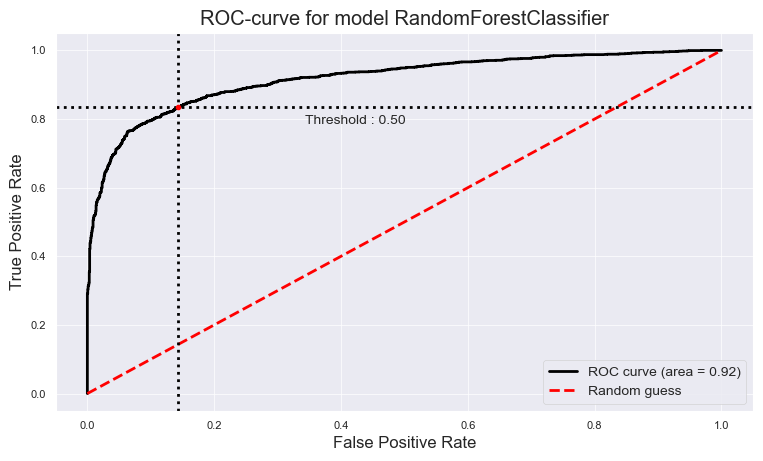

In [63]:
# ROC-AUC
bc = BinaryClassification(y_test, y_pred_prob_rf, labels=["Class 1"])
print('  -------------------------------------------------')
print('   Roc-Auc Score is: {:.3f}'.format(roc_auc_score(y_test, y_pred_prob_rf)))
print('  -------------------------------------------------')
plt.figure(figsize=(9,5))
bc.plot_roc_curve()
plt.title('ROC-curve for model RandomForestClassifier')
plt.show()
result.loc['RandomForestClassifier','ROC-AUC'] = roc_auc_score(y_test, y_pred_prob_rf).round(2)

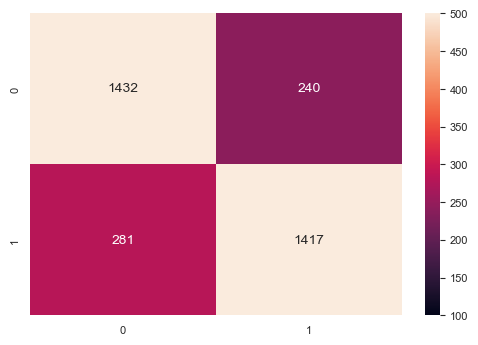

In [64]:
# Error matrix:
confusionMatrix = confusion_matrix(y_test,y_predictions_rf)
sns.heatmap(confusionMatrix,annot=True,fmt='d',vmin=100, vmax=500);

In [65]:
# `Сlassification_report`:
print('----------------------------------------------------------------------------')
print('Сlassification_report for model RandomForestClassifier:')
print('-----------------------------------------------------------------------------')
print(classification_report(y_test,y_predictions_rf))
print('-----------------------------------------------------------------------------')
F1Score_rf = f1_score(y_test, y_predictions_rf, average='micro') #it can be : binary,macro,weighted,samples
#print('F1 Score Micro for RF model is : ', F1Score_rf.round(3))
result.loc['RandomForestClassifier','F1 score'] = F1Score_rf.round(2)

----------------------------------------------------------------------------
Сlassification_report for model RandomForestClassifier:
-----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1672
           1       0.86      0.83      0.84      1698

    accuracy                           0.85      3370
   macro avg       0.85      0.85      0.85      3370
weighted avg       0.85      0.85      0.85      3370

-----------------------------------------------------------------------------


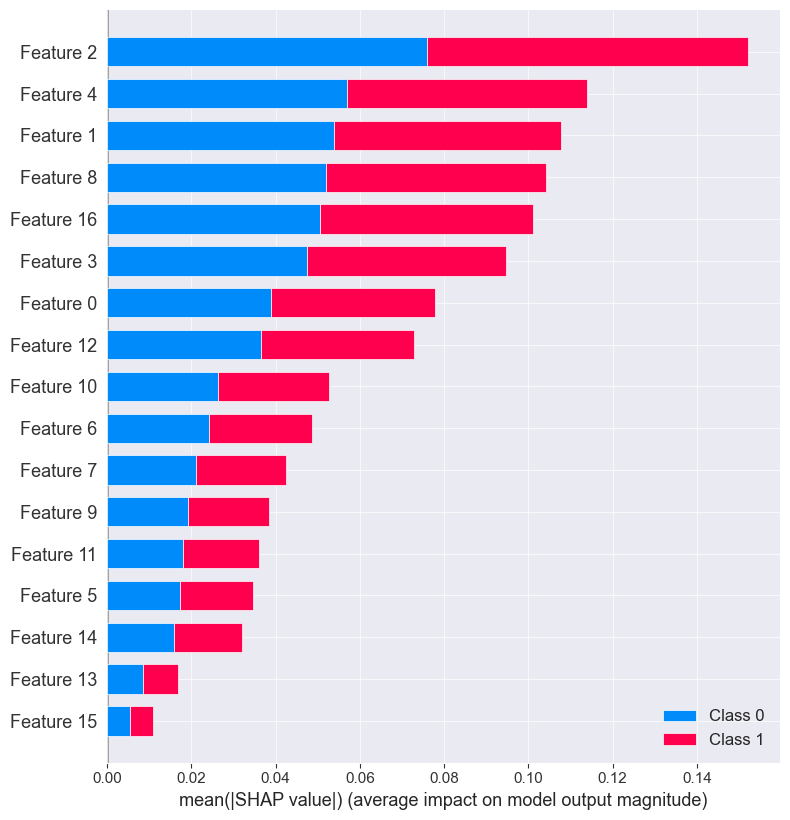

In [66]:
explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [67]:
explainer = shap.Explainer(model_rf)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
#fig = plt.figure(figsize=(12, 6))
#plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
#plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
#plt.title('SHAP Importance')
#shap.plots.bar(shap_values, max_display=X_test.shape[0])

<a id="model5"></a>
### 2.5. Selection of parameters and training of the DecisionTreeClassifier model

In [68]:
#model_dt = DecisionTreeClassifier(random_state=42)
                                  #class_weight='balanced')
                              
##scorer = make_scorer(accuracy_score)
#params = {'max_depth': [6,10,20,50],
#          'criterion'    : ['gini', 'entropy'],
#          'max_features': ['auto', 'sqrt', 'log2']
#          #'leaf_estimation_iterations': [4],
          #'eval_metric': ['F1', 'AUC'] 
          #'custom_metric' : ['TotalF1','Recall','Precision', 'AUC']
#         }
#grid = GridSearchCV(estimator=model_dt, param_grid = params,\
#                    return_train_score='warn',\
#                    cv = 5, n_jobs=-1, verbose =2, refit=True)
#grid.fit(X_train, y_train)
##, cat_features = cat_features)
#print(" Results from Grid Search ")
#print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
#print("\n The best score across ALL searched params:\n", grid.best_score_)
#print("\n The best parameters across ALL searched params:\n", grid.best_params_)    

#Results from Grid Search
#The best estimator across ALL searched params:
# DecisionTreeClassifier(criterion='entropy', max_depth=50, max_features='auto',
                       #random_state=42)
#
# The best score across ALL searched params:
# 0.7658397240741455
#
# The best parameters across ALL searched params:
# {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto'}
#CPU times: total: 297 ms
#Wall time: 1.35 s

In [69]:
model_dt = DecisionTreeClassifier(criterion = 'entropy', \
                                max_features= 'auto', max_depth=50,\
                                random_state=42) 
model_dt.fit(X_train, y_train)

#Calculating Details
print('DecisionTreeClassifier Train Score is : ' , model_dt.score(X_train, y_train).round(3))
print('DecisionTreeClassifier Test Score is : ' , model_dt.score(X_test, y_test).round(3))
#print('RandomForestClassifierModel features importances are : ' , model_rf.feature_importances_)
#Print('----------------------------------------------------')

DecisionTreeClassifier Train Score is :  1.0
DecisionTreeClassifier Test Score is :  0.769


In [70]:
y_predictions_dt = model_dt.predict(X_test)
y_pred_prob_dt = model_dt.predict_proba(X_test)[:,1]
print('Predicted Value for DecisionTreeClassifierModel is : ' , y_predictions_dt[:5])
print('Prediction Probabilities Value for DecisionTreeClassifierModel is : ' , y_pred_prob_dt[:5])
print('-------------------------------------------------------------------------------------')
print()
print("Accuracy score for model DecisionTreeClassifier in test: {:.2f}"\
      .format(accuracy_score(y_test, y_predictions_dt)))
result.loc['DecisionTreeClassifier','Accuracy'] = accuracy_score(y_test, y_predictions_dt).round(2)

Predicted Value for DecisionTreeClassifierModel is :  [1 1 0 0 0]
Prediction Probabilities Value for DecisionTreeClassifierModel is :  [1. 1. 0. 0. 0.]
-------------------------------------------------------------------------------------

Accuracy score for model DecisionTreeClassifier in test: 0.77


  -------------------------------------------------
   Roc-Auc Score is: 0.769
  -------------------------------------------------


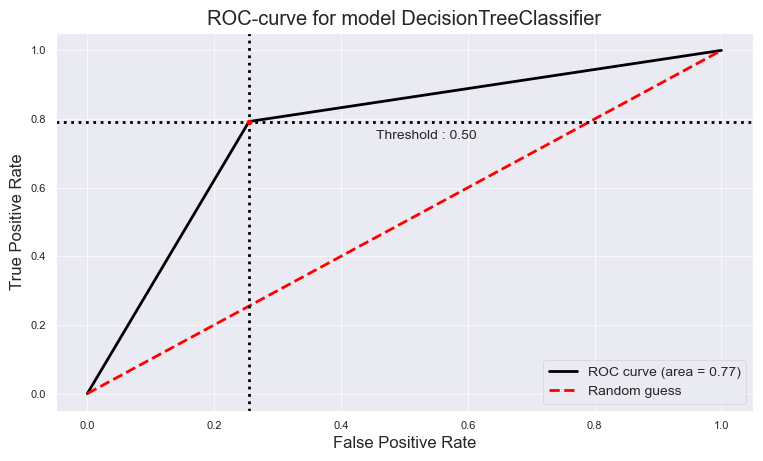

In [71]:
# Посмотрим на ROC-AUC в графическом представлении
bc = BinaryClassification(y_test, y_pred_prob_dt, labels=["Class 1"])
print('  -------------------------------------------------')
print('   Roc-Auc Score is: {:.3f}'.format(roc_auc_score(y_test, y_pred_prob_dt)))
print('  -------------------------------------------------')
plt.figure(figsize=(9,5))
bc.plot_roc_curve()
plt.title('ROC-curve for model DecisionTreeClassifier')
plt.show()
result.loc['DecisionTreeClassifier','ROC-AUC'] = roc_auc_score(y_test, y_pred_prob_dt).round(2)

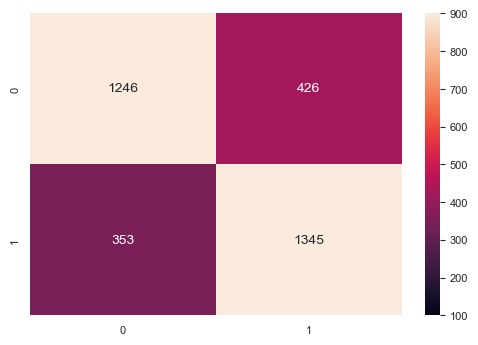

In [72]:
# Error matrix:
confusionMatrix = confusion_matrix(y_test,y_predictions_dt)
sns.heatmap(confusionMatrix,annot=True,fmt='d', vmin=100, vmax=900);

In [73]:
# `Сlassification_report`
print('----------------------------------------------------------------------------')
print('Сlassification_report for model DecisionTreeClassifier:')
print('-----------------------------------------------------------------------------')
print(classification_report(y_test,y_predictions_dt))
F1Score_dt = f1_score(y_test, y_predictions_dt, average='micro') #it can be : binary,macro,weighted,samples
#print('F1 Score Micro for RF model is : ', F1Score_rf.round(3))
result.loc['DecisionTreeClassifier','F1 score'] = F1Score_dt.round(2)

----------------------------------------------------------------------------
Сlassification_report for model DecisionTreeClassifier:
-----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1672
           1       0.76      0.79      0.78      1698

    accuracy                           0.77      3370
   macro avg       0.77      0.77      0.77      3370
weighted avg       0.77      0.77      0.77      3370



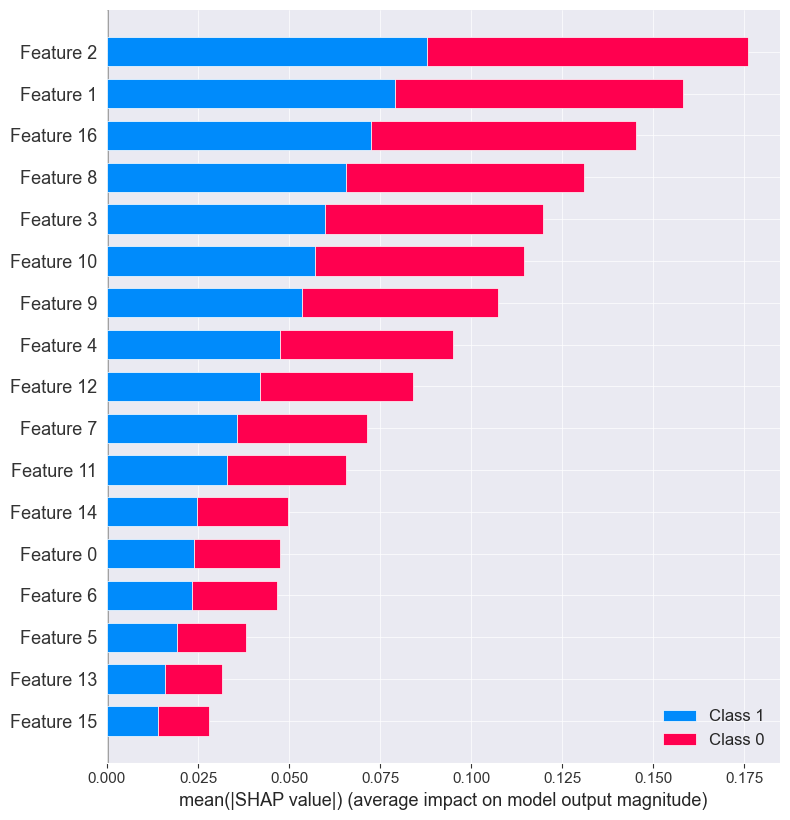

In [74]:
explainer = shap.TreeExplainer(model_dt)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [75]:
explainer = shap.Explainer(model_dt)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
#fig = plt.figure(figsize=(12, 6))
#plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
#plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
#plt.title('SHAP Importance')
#shap.plots.bar(shap_values, max_display=X_test.shape[0])

In [76]:
result.sort_values(by=(['F1 score', 'ROC-AUC']), ascending=False)

Accuracy ROC-AUC F1 score
CatBoostClassifier      0.86     0.93    0.86   
RandomForestClassifier  0.85     0.92    0.85   
DecisionTreeClassifier  0.77     0.77    0.77   
DummyClassifier         0.5      0.5     0.5    
KerasSequential         NaN      NaN     NaN

<a id="model6"></a>
### 2.6. Building and training Keras Sequential model (without cross-validation)

In [77]:
n_features = X.shape[1]

In [78]:
model = Sequential()
model.add(Dense(20, input_shape=(n_features,), activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss= 'binary_crossentropy', optimizer = 'adam', 
              metrics = [tf.keras.metrics.Accuracy(),
                         tf.keras.metrics.AUC(from_logits=True)
                         ])

In [79]:
history = model.fit(X_train,y_train,
                   batch_size=32, epochs = 200,
                   validation_data = (X_test, y_test),
                   verbose = 1)

Epoch 1/200
422/422 [==============================] - 1s 2ms/step - loss: 0.6701 - accuracy: 0.0000e+00 - auc: 0.6236 - val_loss: 0.6248 - val_accuracy: 0.0000e+00 - val_auc: 0.7359
Epoch 2/200
422/422 [==============================] - 1s 2ms/step - loss: 0.6187 - accuracy: 0.0000e+00 - auc: 0.7221 - val_loss: 0.5962 - val_accuracy: 0.0000e+00 - val_auc: 0.7528
Epoch 3/200
422/422 [==============================] - 1s 2ms/step - loss: 0.6021 - accuracy: 0.0000e+00 - auc: 0.7433 - val_loss: 0.5913 - val_accuracy: 0.0000e+00 - val_auc: 0.7576
Epoch 4/200
422/422 [==============================] - 1s 2ms/step - loss: 0.5936 - accuracy: 0.0000e+00 - auc: 0.7542 - val_loss: 0.5852 - val_accuracy: 0.0000e+00 - val_auc: 0.7625
Epoch 5/200
422/422 [==============================] - 1s 2ms/step - loss: 0.5891 - accuracy: 0.0000e+00 - auc: 0.7583 - val_loss: 0.5798 - val_accuracy: 0.0000e+00 - val_auc: 0.7666
Epoch 6/200
422/422 [==============================] - 1s 2ms/step - loss: 0.5817 - a

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                360       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

106/106 [==============================] - 0s 677us/step
Accuracy:  0.4961


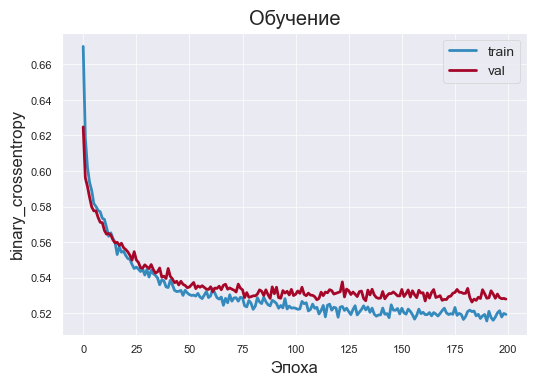

In [81]:
y_predict=model.predict(X_test) 
y_classes=np.argmax(y_predict,axis=1)

score = accuracy_score(y_test.array, y_classes)
print('Accuracy: ', score.round(4))

plt.title('Обучение')
plt.xlabel('Эпоха')
plt.ylabel('binary_crossentropy')

plt.plot(history.history['loss'],
        label = 'train')
plt.plot(history.history['val_loss'],
        label = 'val')
plt.legend();

  -------------------------------------------------
   Roc-Auc Score is: 0.814
  -------------------------------------------------


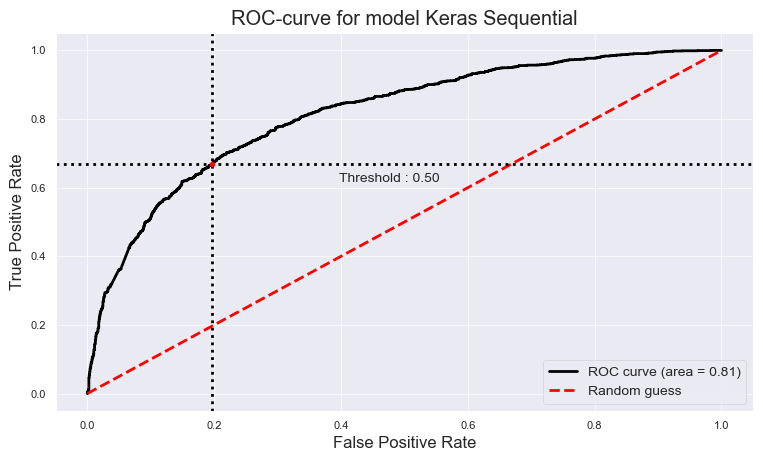

In [82]:
# ROC-AUC
bc = BinaryClassification(y_test, y_predict, labels=["Class 1"])
print('  -------------------------------------------------')
print('   Roc-Auc Score is: {:.3f}'.format(roc_auc_score(y_test, y_predict)))
print('  -------------------------------------------------')
plt.figure(figsize=(9,5))
bc.plot_roc_curve()
plt.title('ROC-curve for model Keras Sequential')
plt.show()
result.loc['KerasSequential','Accuracy'] = accuracy_score(y_test.array, y_classes).round(2)
result.loc['KerasSequential','ROC-AUC'] = roc_auc_score(y_test.array, y_classes).round(2)

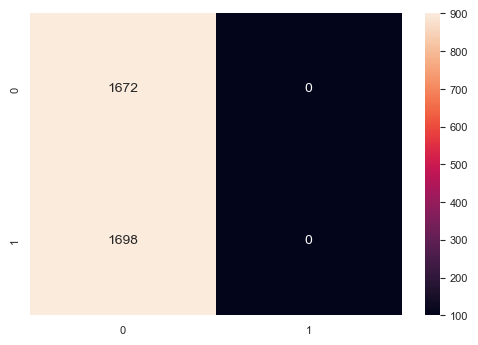

In [83]:
# Error matrix
confusionMatrix = confusion_matrix(y_test,y_classes)
sns.heatmap(confusionMatrix,annot=True,fmt='d', vmin=100, vmax=900);

In [84]:
# `Сlassification_report`
print('----------------------------------------------------------------------------')
print('Сlassification_report for model Keras Sequential:')
print('-----------------------------------------------------------------------------')
print(classification_report(y_test,y_classes))
#F1Score_kera = f1_score(y_test.array, y_classes)
#result.loc['KerasSequential','F1 score'] = F1Score_kera.round(2)

----------------------------------------------------------------------------
Сlassification_report for model Keras Sequential:
-----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      1672
           1       0.00      0.00      0.00      1698

    accuracy                           0.50      3370
   macro avg       0.25      0.50      0.33      3370
weighted avg       0.25      0.50      0.33      3370



In [85]:
# Because In keras, metrics are calculated a little differently, let’s recalculate them separately:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=200, verbose=0)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
loss, accuracy, f1_score, precision, recall

(0.5342914462089539,
 0.7362017631530762,
 0.7148521542549133,
 0.7766997218132019,
 0.672275960445404)

In [86]:
result.loc['KerasSequential','Accuracy'] = 0.74
result.loc['KerasSequential','ROC-AUC'] = 0.81
result.loc['KerasSequential','F1 score'] = 0.73

<a id="conclusion"></a>
## 3. Conclusions and selection of the best model

In [87]:
# Comparative metrics for all models
result.sort_values(by=(['F1 score', 'ROC-AUC']), ascending=False)

Accuracy ROC-AUC F1 score
CatBoostClassifier      0.86     0.93    0.86   
RandomForestClassifier  0.85     0.92    0.85   
DecisionTreeClassifier  0.77     0.77    0.77   
KerasSequential         0.74     0.81    0.73   
DummyClassifier         0.5      0.5     0.5

### Conclusions
* If we make a decision based on the ROC-AUC metric, then the best models will be CatboostClassifier (0.93) and RandomForestClassifier (0.92)
* If we make a decision based on the F1 metric (for predicting exactly 1 class or a weighted one), then the best models will also be CatboostClassifier (0.86) and RandomForestClassifier (0.85)
* Unfortunately, the neural network (a simple network, without using cross/validation) does not predict class 1 at all, although the accuracy for class 0 is high.
* I would suggest using the CatboostClassifier model for predictions
* To improve the quality of the model, I would recommend obtaining cleaner data (the income data is questionable, as well as the unclear duplications in many categorical features)
* Also, one of the reasons for the not very high quality of class 1 prediction may be the relatively small amount of data in the dataset
* The classes were very unbalanced (13/87), the balancing was done artificially, and this may also have affected the quality of the models

In [88]:
#with open('model_cb.pkl', 'wb') as f:
#    pickle.dump(model_cb, f)

In [89]:
#with open('model_rf.pkl', 'wb') as f:
#    pickle.dump(model_rf, f)

In [90]:
#!pip freeze > requirements.txt